In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

## Method 2: Daily Exponential Smoothing Without Sliding Window

Loading data...
Data shape after filtering for positive SalesValue: (298881, 15)


Processing Cluster 1
Daily data points: 604
Train size: 358, Validation size: 120, Test size: 126
Tried {'trend': 'add', 'seasonal': 'add', 'damped_trend': True}, Validation MAPE: 48.967057
Tried {'trend': 'add', 'seasonal': 'add', 'damped_trend': False}, Validation MAPE: 45.371403
Tried {'trend': 'add', 'seasonal': 'mul', 'damped_trend': True}, Validation MAPE: 48.418103
Tried {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}, Validation MAPE: 43.431297
Tried {'trend': 'add', 'seasonal': None, 'damped_trend': True}, Validation MAPE: 46.673279
Tried {'trend': 'add', 'seasonal': None, 'damped_trend': False}, Validation MAPE: 117.955097
Tried {'trend': 'mul', 'seasonal': 'add', 'damped_trend': True}, Validation MAPE: 49.933964
Tried {'trend': 'mul', 'seasonal': 'add', 'damped_trend': False}, Validation MAPE: 46.958050
Tried {'trend': 'mul', 'seasonal': 'mul', 'damped_trend': True}, Validation MAPE

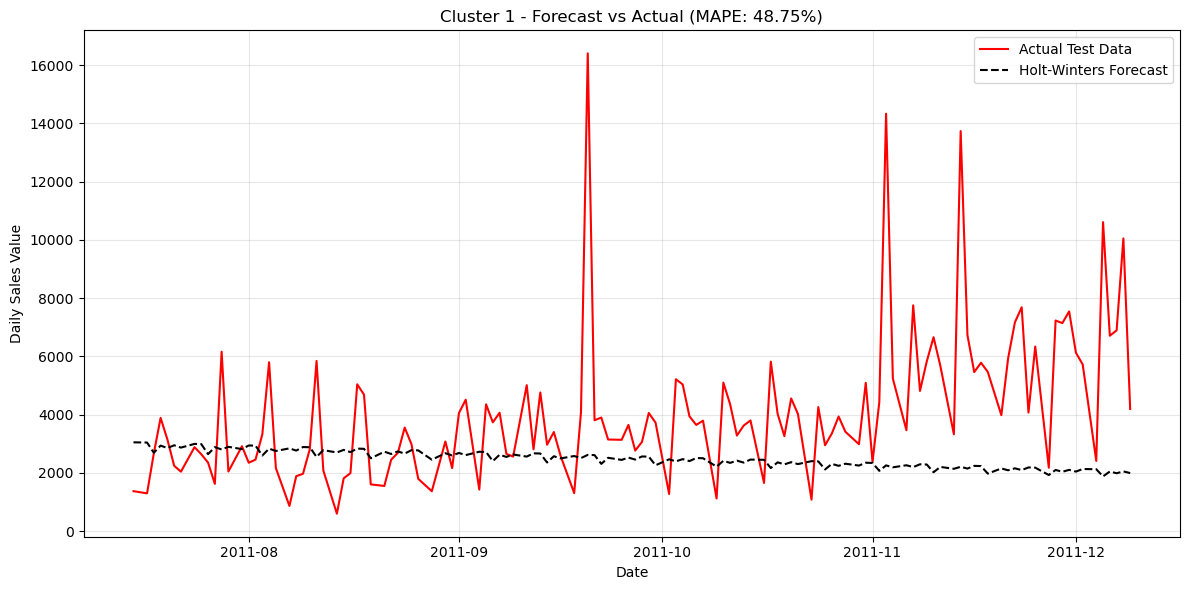

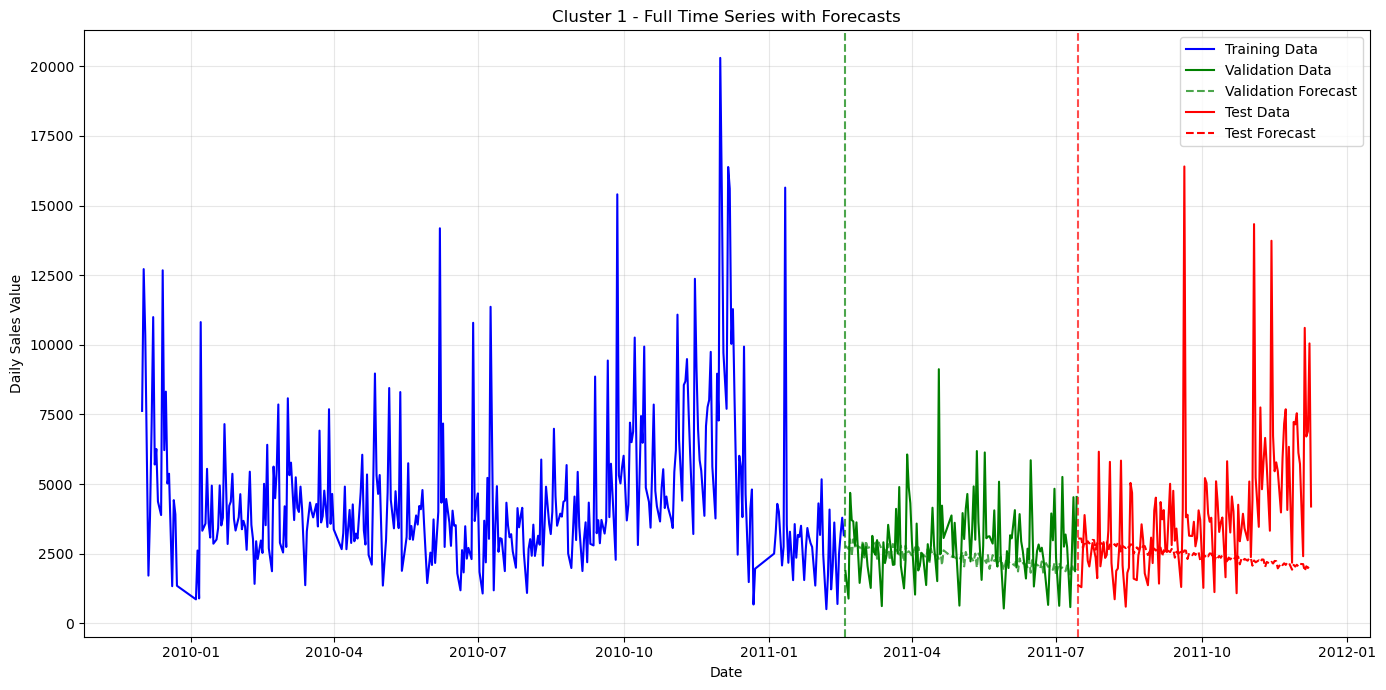


Processing time for Cluster 1: 0.87 seconds


Processing Cluster 2
Daily data points: 604
Train size: 358, Validation size: 120, Test size: 126
Tried {'trend': 'add', 'seasonal': 'add', 'damped_trend': True}, Validation MAPE: 98.931712
Tried {'trend': 'add', 'seasonal': 'add', 'damped_trend': False}, Validation MAPE: 87.626505
Tried {'trend': 'add', 'seasonal': 'mul', 'damped_trend': True}, Validation MAPE: 72.474976
Tried {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}, Validation MAPE: 86.117514
Tried {'trend': 'add', 'seasonal': None, 'damped_trend': True}, Validation MAPE: 86.813972
Tried {'trend': 'add', 'seasonal': None, 'damped_trend': False}, Validation MAPE: 72.360785
Tried {'trend': 'mul', 'seasonal': 'add', 'damped_trend': True}, Validation MAPE: 98.815282
Tried {'trend': 'mul', 'seasonal': 'add', 'damped_trend': False}, Validation MAPE: 90.585396
Tried {'trend': 'mul', 'seasonal': 'mul', 'damped_trend': True}, Validation MAPE: 104.581762
Tried {'trend': 'mul', '

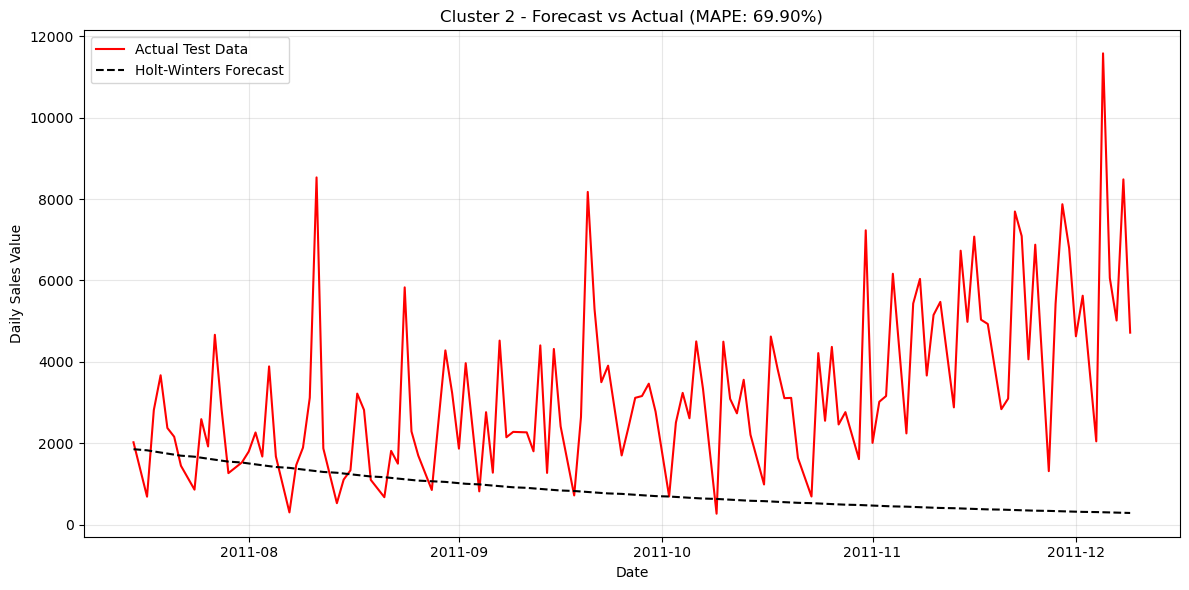

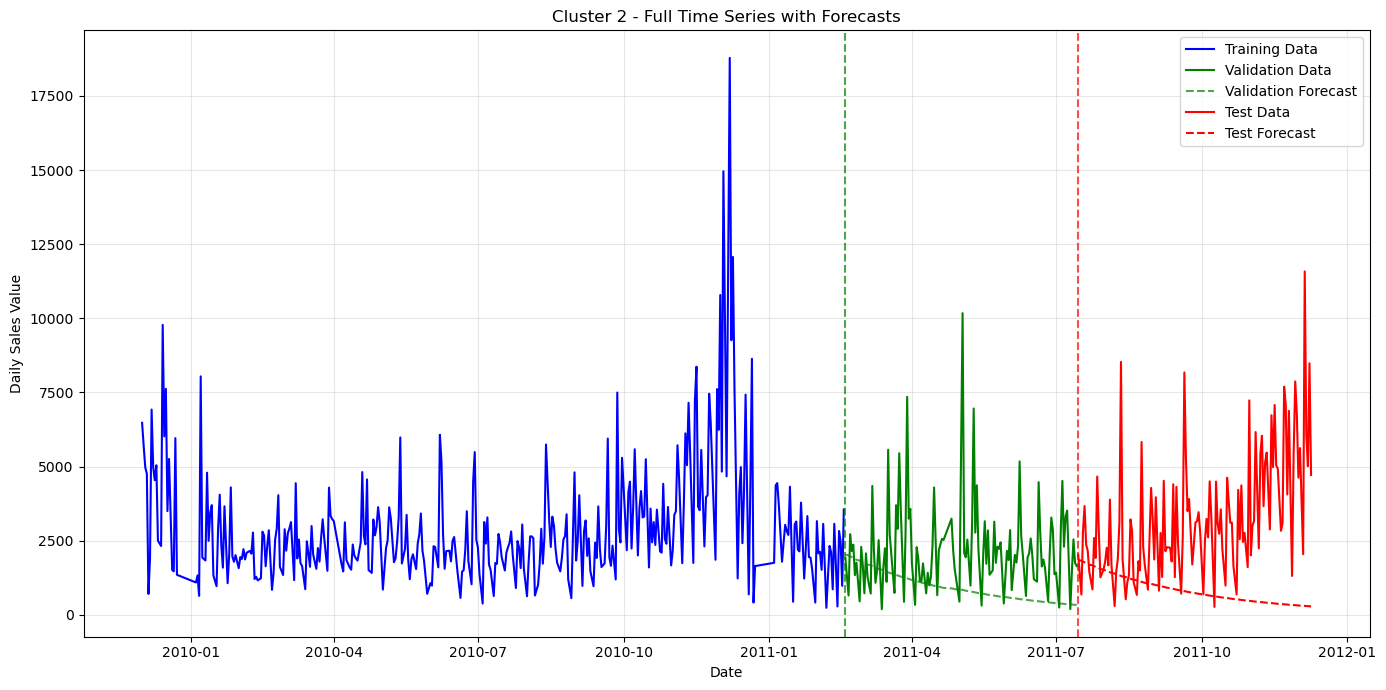


Processing time for Cluster 2: 0.89 seconds


Processing Cluster 0
Daily data points: 604
Train size: 358, Validation size: 120, Test size: 126
Tried {'trend': 'add', 'seasonal': 'add', 'damped_trend': True}, Validation MAPE: 51.437578
Tried {'trend': 'add', 'seasonal': 'add', 'damped_trend': False}, Validation MAPE: 53.800959
Tried {'trend': 'add', 'seasonal': 'mul', 'damped_trend': True}, Validation MAPE: 51.633494
Tried {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}, Validation MAPE: 61.737612
Tried {'trend': 'add', 'seasonal': None, 'damped_trend': True}, Validation MAPE: 50.349699
Tried {'trend': 'add', 'seasonal': None, 'damped_trend': False}, Validation MAPE: 54.567268
Tried {'trend': 'mul', 'seasonal': 'add', 'damped_trend': True}, Validation MAPE: 51.784134
Tried {'trend': 'mul', 'seasonal': 'add', 'damped_trend': False}, Validation MAPE: 55.297122
Tried {'trend': 'mul', 'seasonal': 'mul', 'damped_trend': True}, Validation MAPE: 52.056010
Tried {'trend': 'mul', 's

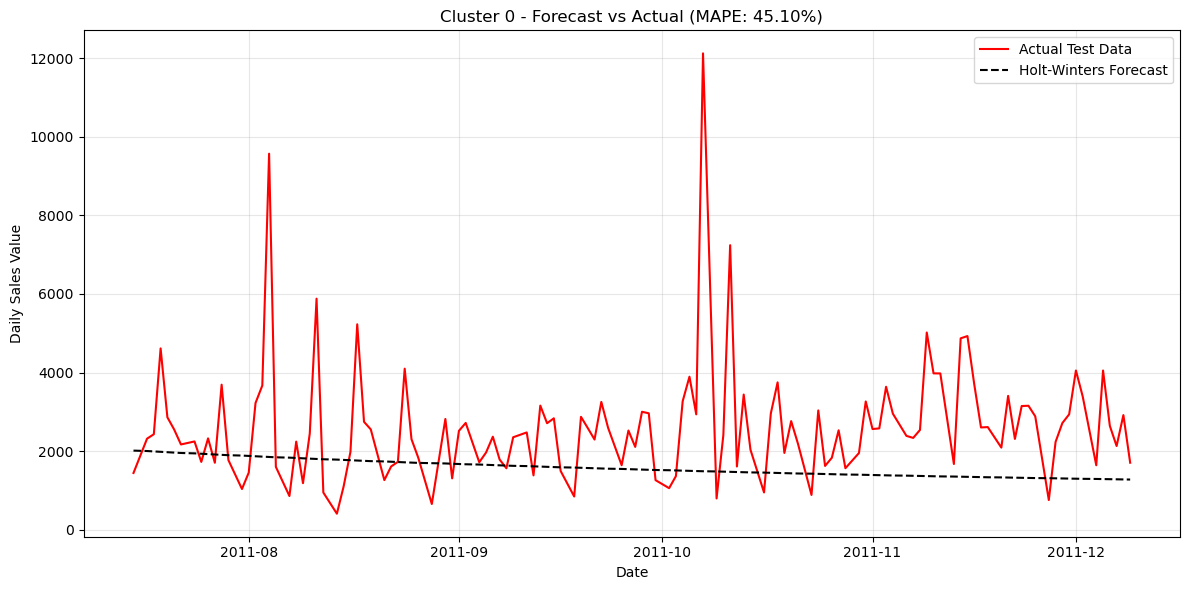

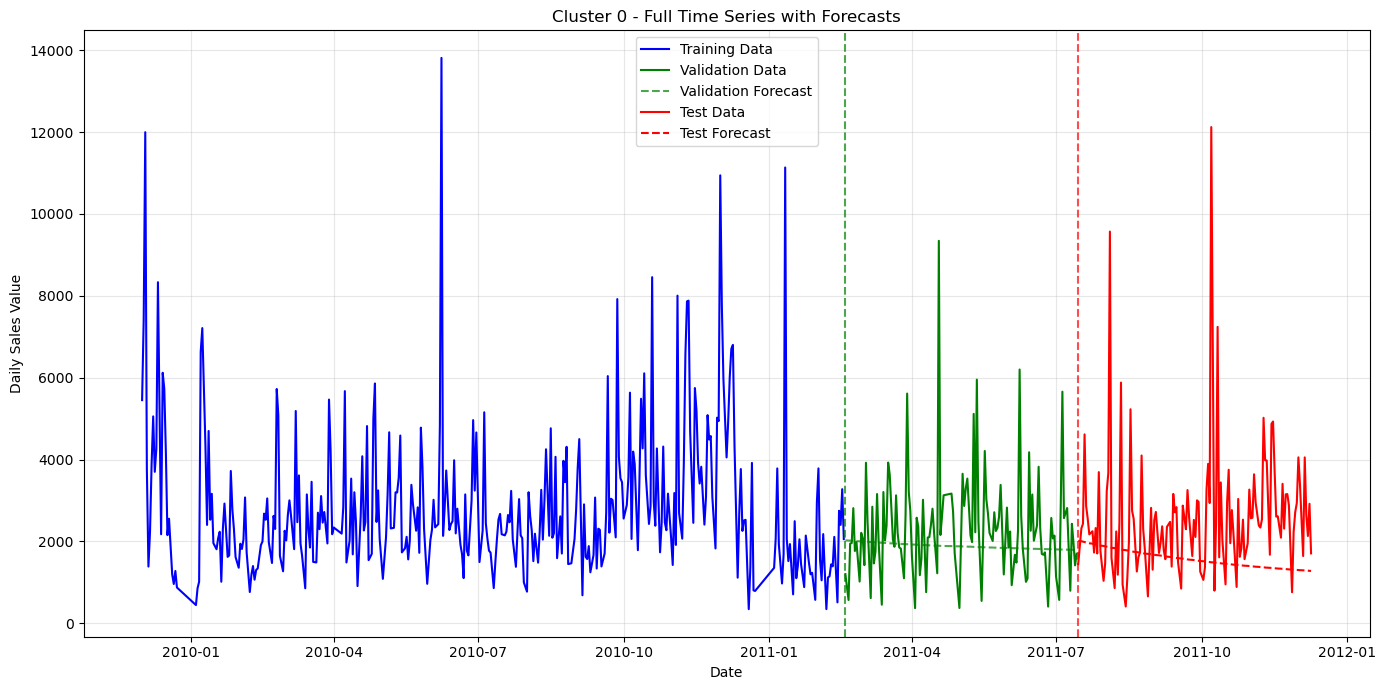


Processing time for Cluster 0: 0.88 seconds

--- Overall Cluster Summary ---
 Cluster  Validation_MAPE  Test_MAPE    Test_MAE   Test_RMSE
       1        43.431297  48.750431 2092.982300 3105.466546
       2        71.079424  69.897670 2588.743077 3394.486597
       0        50.349699  45.102650 1265.915597 1883.665178

Average Test MAPE across all clusters: 54.5836%


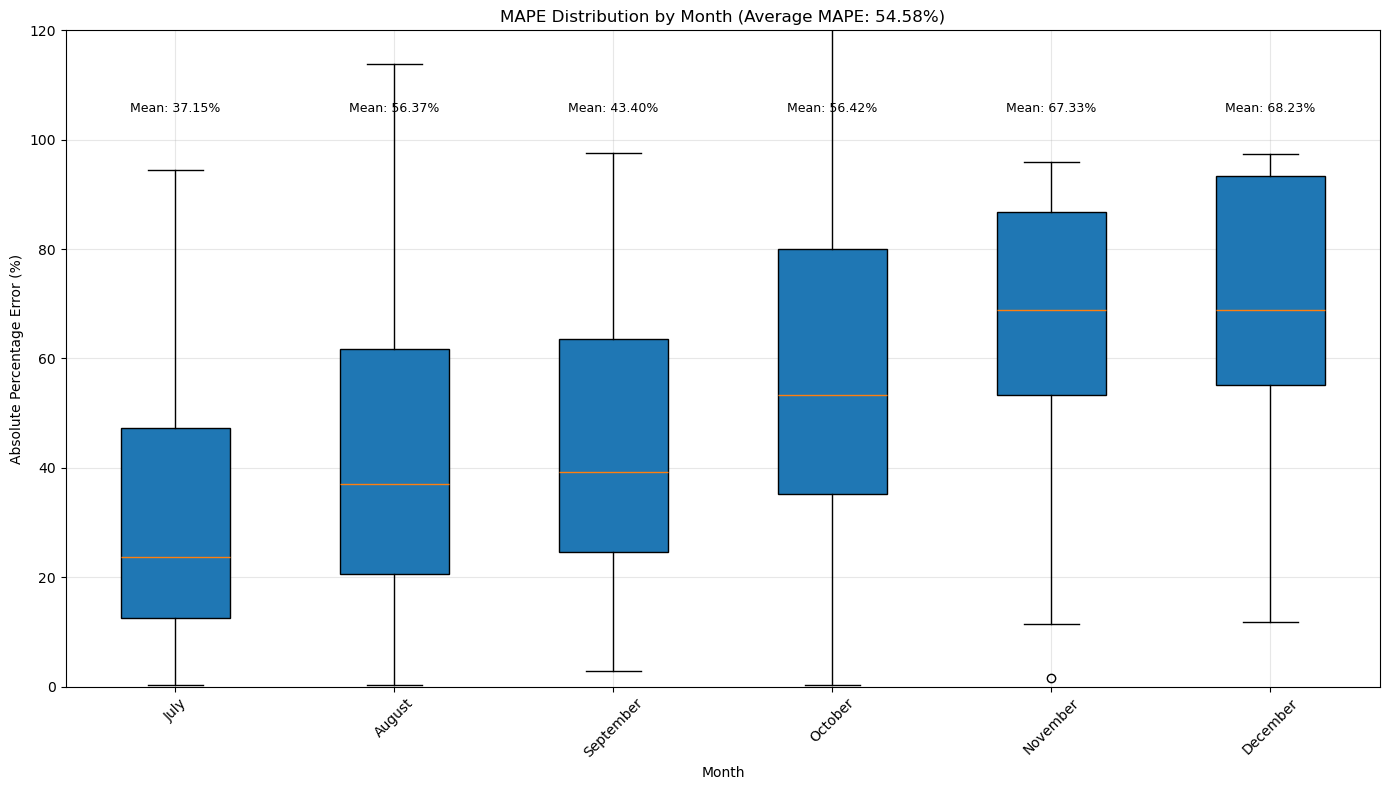


--- Summary Statistics for MAPE by Month ---

July:
  Number of days: 42
  Mean APE: 37.15%
  Median APE: 23.74%
  Min APE: 0.27%
  Max APE: 166.08%
  Standard Deviation: 36.71%

August:
  Number of days: 78
  Mean APE: 56.37%
  Median APE: 37.11%
  Min APE: 0.30%
  Max APE: 367.15%
  Standard Deviation: 69.48%

September:
  Number of days: 78
  Mean APE: 43.40%
  Median APE: 39.30%
  Min APE: 2.78%
  Max APE: 97.49%
  Standard Deviation: 25.48%

October:
  Number of days: 78
  Mean APE: 56.42%
  Median APE: 53.24%
  Min APE: 0.32%
  Max APE: 136.27%
  Standard Deviation: 26.85%

November:
  Number of days: 78
  Mean APE: 67.33%
  Median APE: 68.85%
  Min APE: 1.54%
  Max APE: 95.86%
  Standard Deviation: 21.22%

December:
  Number of days: 24
  Mean APE: 68.23%
  Median APE: 68.82%
  Min APE: 11.78%
  Max APE: 97.39%
  Standard Deviation: 24.54%

Monthly MAPE Summary:
    Month  Number of Days  Mean APE (%)  Median APE (%)  Min APE (%)  Max APE (%)  Std Dev (%)
     July             

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Suppress warnings
warnings.filterwarnings("ignore")

# Load data
print("Loading data...")
data = pd.read_csv("merged_with_word2vec_clusters.csv")

# Ensure InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate sales value if not already present
if 'SalesValue' not in data.columns:
    data['SalesValue'] = data['Quantity'] * data['Price']

# Filter to only positive values
data = data[data['SalesValue'] > 0]
print(f"Data shape after filtering for positive SalesValue: {data.shape}")

# Store results for final boxplot by month
monthly_ape_values = {}
month_labels = []
ape_values_list = []

# Store overall results for each cluster
cluster_results = []

# Define model parameters to test
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'damped_trend': [True, False]
}
grid = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

# Process for each cluster
clusters = data['word2vec_cluster'].unique()

for cluster in clusters:
    start_time = time.time()
    print(f"\n\n{'='*50}")
    print(f"Processing Cluster {cluster}")
    print(f"{'='*50}")
    
    # Filter data for this cluster
    cluster_df = data[data['word2vec_cluster'] == cluster].copy()
    
    # Aggregate by day
    daily_data = cluster_df.groupby(data['InvoiceDate'].dt.floor('D'))['SalesValue'].sum().reset_index()
    daily_data = daily_data.rename(columns={'InvoiceDate': 'ds', 'SalesValue': 'y'})
    daily_data = daily_data.sort_values('ds').dropna(subset=['y'])
    
    # Add month information
    daily_data['Month'] = daily_data['ds'].dt.month_name()
    
    # Check if data exists after preprocessing
    if len(daily_data) < 14:  # Need at least 14 days for meaningful splits
        print(f"Not enough data points for Cluster {cluster}. Skipping.")
        continue
        
    print(f"Daily data points: {len(daily_data)}")
    
    # Calculate split points for 60% train, 20% validation, 20% test
    total_days = (daily_data['ds'].max() - daily_data['ds'].min()).days
    test_days = int(total_days * 0.20)
    val_days = int(total_days * 0.20)
    
    cutoff_test = daily_data['ds'].max() - pd.Timedelta(days=test_days)
    cutoff_val = cutoff_test - pd.Timedelta(days=val_days)
    
    # Create the splits
    train_data = daily_data[daily_data['ds'] < cutoff_val].copy()
    val_data = daily_data[(daily_data['ds'] >= cutoff_val) & 
                          (daily_data['ds'] < cutoff_test)].copy()
    test_data = daily_data[daily_data['ds'] >= cutoff_test].copy()
    test_data = test_data.sort_values('ds')
    
    print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")
    
    # Check if we have enough data in each set
    if len(train_data) < 7 or len(val_data) < 3 or len(test_data) < 3:
        print(f"Not enough data in splits for Cluster {cluster}. Skipping.")
        continue
    
    # Set index for time series modeling
    train_set = train_data.set_index('ds')
    val_set = val_data.set_index('ds')
    test_set = test_data.set_index('ds')
    
    results_list = []
    
    # Test all parameter combinations
    for params in grid:
        param_dict = dict(zip(param_names, params))
        
        # Skip invalid combinations (can't have damped trend without trend)
        if param_dict['trend'] is None and param_dict['damped_trend'] is True:
            continue
        
        try:
            # Create and fit model on training data
            model = ExponentialSmoothing(
                train_set['y'],
                trend=param_dict['trend'],
                seasonal=param_dict['seasonal'],
                seasonal_periods=7,  # Weekly seasonality
                damped_trend=param_dict['damped_trend']
            ).fit(optimized=True)
            
            # Forecast validation period
            val_forecast = model.forecast(len(val_set)).reset_index(drop=True)
            
            # Merge actual and forecasted values
            merged = val_set.reset_index(drop=False).copy()
            merged['yhat'] = val_forecast.values
            merged = merged.set_index('ds')
            
            # Calculate APE values with handling for zeros and infinities
            safe_y = merged['y'].replace(0, 1e-10)
            merged['ape'] = 100 * np.abs((merged['y'] - merged['yhat']) / safe_y)
            merged['ape'] = merged['ape'].replace([np.inf, -np.inf], np.nan).fillna(0)
            
            # Calculate validation MAPE
            mape_val = merged['ape'].mean()
            
            # Store results
            results_list.append({'params': param_dict, 'MAPE': mape_val, 'model': model})
            
            print(f"Tried {param_dict}, Validation MAPE: {mape_val:.6f}")
            
        except Exception as e:
            print(f"Error with params {param_dict}: {e}")
    
    # Select best model based on validation MAPE
    if not results_list:
        print(f"No successful models for Cluster {cluster}")
        continue
    
    results_df = pd.DataFrame(results_list)
    best_result = results_df.loc[results_df['MAPE'].idxmin()]
    
    print("\nBest Parameters Found (from validation set):")
    print(best_result['params'])
    
    # Refit on combined train + validation data
    full_train = daily_data[daily_data['ds'] < cutoff_test].copy().set_index('ds')
    
    try:
        # Create and fit best model on combined data
        refit_model = ExponentialSmoothing(
            full_train['y'],
            trend=best_result['params']['trend'],
            seasonal=best_result['params']['seasonal'],
            seasonal_periods=7,
            damped_trend=best_result['params']['damped_trend']
        ).fit(optimized=True)
        
        # Forecast test period
        test_forecast = refit_model.forecast(len(test_set)).reset_index(drop=True)
        
        # Prepare test evaluation DataFrame
        test_eval = test_set.copy().reset_index(drop=False)
        test_eval['yhat'] = test_forecast.values
        test_eval = test_eval.set_index('ds')
        
        # Calculate test metrics
        safe_y = test_eval['y'].replace(0, 1e-10)
        test_eval['ape'] = 100 * np.abs((test_eval['y'] - test_eval['yhat']) / safe_y)
        test_eval['ape'] = test_eval['ape'].replace([np.inf, -np.inf], np.nan).fillna(0)
        
        mape_test = test_eval['ape'].mean()
        mae_test = mean_absolute_error(test_eval['y'], test_eval['yhat'])
        rmse_test = np.sqrt(mean_squared_error(test_eval['y'], test_eval['yhat']))
        
        print("\n--- Final Test Set Evaluation (Holt-Winters) ---")
        print(f"MAPE: {mape_test:.4f}%")
        print(f"MAE : {mae_test:.4f}")
        print(f"RMSE: {rmse_test:.4f}")
        
        # Store cluster results
        cluster_result = {
            'Cluster': cluster,
            'Best_Model_Params': best_result['params'],
            'Validation_MAPE': best_result['MAPE'],
            'Test_MAPE': mape_test,
            'Test_MAE': mae_test,
            'Test_RMSE': rmse_test
        }
        cluster_results.append(cluster_result)
        
        # Store APE values by month for the boxplot
        test_eval_with_month = test_data.merge(
            test_eval['ape'].reset_index(),
            on='ds',
            how='left'
        )
        
        for month in test_eval_with_month['Month'].unique():
            month_data = test_eval_with_month[test_eval_with_month['Month'] == month]
            
            if month not in monthly_ape_values:
                monthly_ape_values[month] = []
            
            monthly_ape_values[month].extend(month_data['ape'].tolist())
            month_labels.extend([month] * len(month_data))
            ape_values_list.extend(month_data['ape'].tolist())
        
        # Plot test results
        plt.figure(figsize=(12, 6))
        plt.plot(test_eval.index, test_eval['y'], 'r-', label='Actual Test Data')
        plt.plot(test_eval.index, test_eval['yhat'], 'k--', label='Holt-Winters Forecast')
        plt.title(f'Cluster {cluster} - Forecast vs Actual (MAPE: {mape_test:.2f}%)')
        plt.xlabel('Date')
        plt.ylabel('Daily Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot full results
        plt.figure(figsize=(14, 7))
        
        # Plot training data
        train_plot = train_data.set_index('ds')
        plt.plot(train_plot.index, train_plot['y'], 'b-', label='Training Data')
        
        # Plot validation data and best model forecast on validation
        val_plot = val_data.set_index('ds')
        val_forecast = best_result['model'].forecast(len(val_plot))
        plt.plot(val_plot.index, val_plot['y'], 'g-', label='Validation Data')
        plt.plot(val_plot.index, val_forecast, 'g--', alpha=0.7, label='Validation Forecast')
        
        # Plot test data and forecast
        plt.plot(test_eval.index, test_eval['y'], 'r-', label='Test Data')
        plt.plot(test_eval.index, test_eval['yhat'], 'r--', label='Test Forecast')
        
        # Add vertical lines for train/val/test splits
        plt.axvline(x=cutoff_val, color='g', linestyle='--', alpha=0.7)
        plt.axvline(x=cutoff_test, color='r', linestyle='--', alpha=0.7)
        
        plt.title(f'Cluster {cluster} - Full Time Series with Forecasts')
        plt.xlabel('Date')
        plt.ylabel('Daily Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error in final model fitting/evaluation: {e}")
    
    end_time = time.time()
    print(f"\nProcessing time for Cluster {cluster}: {(end_time - start_time):.2f} seconds")

# Create summary DataFrame for all clusters
if cluster_results:
    cluster_summary = pd.DataFrame(cluster_results)
    print("\n--- Overall Cluster Summary ---")
    print(cluster_summary[['Cluster', 'Validation_MAPE', 'Test_MAPE', 'Test_MAE', 'Test_RMSE']].to_string(index=False))
    
    # Calculate average MAPE across all clusters
    avg_mape = cluster_summary['Test_MAPE'].mean()
    print(f"\nAverage Test MAPE across all clusters: {avg_mape:.4f}%")

# Create monthly boxplots if we have data
if monthly_ape_values:
    # Define month order for proper sorting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Filter to only include months that exist in our data
    valid_months = [month for month in month_order if month in monthly_ape_values]
    
    # Create a side-by-side boxplot using matplotlib
    plt.figure(figsize=(14, 8))
    
    # Filter and order the monthly_ape_values dictionary
    ordered_monthly_ape = [monthly_ape_values[month] for month in valid_months if month in monthly_ape_values]
    
    # Create boxplot
    boxplot = plt.boxplot(ordered_monthly_ape, labels=valid_months, vert=True, patch_artist=True)
    
    # Calculate and display mean MAPE for each month
    mean_mapes = [np.mean(monthly_ape_values[month]) for month in valid_months if month in monthly_ape_values]
    for i, mean_mape in enumerate(mean_mapes):
        plt.text(i+1, 105, f'Mean: {mean_mape:.2f}%', ha='center', fontsize=9)
    
    plt.title(f'MAPE Distribution by Month (Average MAPE: {avg_mape:.2f}%)')
    plt.ylabel('Absolute Percentage Error (%)')
    plt.xlabel('Month')
    plt.ylim(0, 120)  # Extended to show the mean values above
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Summary statistics for APEs by month
    print("\n--- Summary Statistics for MAPE by Month ---")
    monthly_summary = []
    for month in valid_months:
        if month in monthly_ape_values and len(monthly_ape_values[month]) > 0:
            values = monthly_ape_values[month]
            monthly_summary.append({
                'Month': month,
                'Number of Days': len(values),
                'Mean APE (%)': np.mean(values),
                'Median APE (%)': np.median(values),
                'Min APE (%)': np.min(values),
                'Max APE (%)': np.max(values),
                'Std Dev (%)': np.std(values)
            })
            print(f"\n{month}:")
            print(f"  Number of days: {len(values)}")
            print(f"  Mean APE: {np.mean(values):.2f}%")
            print(f"  Median APE: {np.median(values):.2f}%")
            print(f"  Min APE: {np.min(values):.2f}%")
            print(f"  Max APE: {np.max(values):.2f}%")
            print(f"  Standard Deviation: {np.std(values):.2f}%")
    
    # Create a summary table as DataFrame
    if monthly_summary:
        monthly_summary_df = pd.DataFrame(monthly_summary)
        print("\nMonthly MAPE Summary:")
        print(monthly_summary_df.to_string(index=False))
else:
    print("\nNo monthly data available for analysis.")

## Method 2: Daily Exponential Smoothing With Sliding Window

Loading data...
Data shape after filtering for positive SalesValue: (298881, 15)


Processing Cluster 1 with Sliding Window (Size: 30)
Daily data points: 604
Train size: 358, Validation size: 120, Test size: 126

Trying model: {'trend': 'add', 'seasonal': 'add', 'damped_trend': True}
  Validation MAPE: 74.1653%, MAE: 1419.8293, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'add', 'damped_trend': False}
  Validation MAPE: 72.4104%, MAE: 1381.7890, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': True}
  Validation MAPE: 74.7890%, MAE: 1449.3164, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}
  Validation MAPE: 73.6535%, MAE: 1428.1704, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': None, 'damped_trend': True}
  Validation MAPE: 55.4544%, MAE: 1102.8707, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': None, 'damped_trend': False}

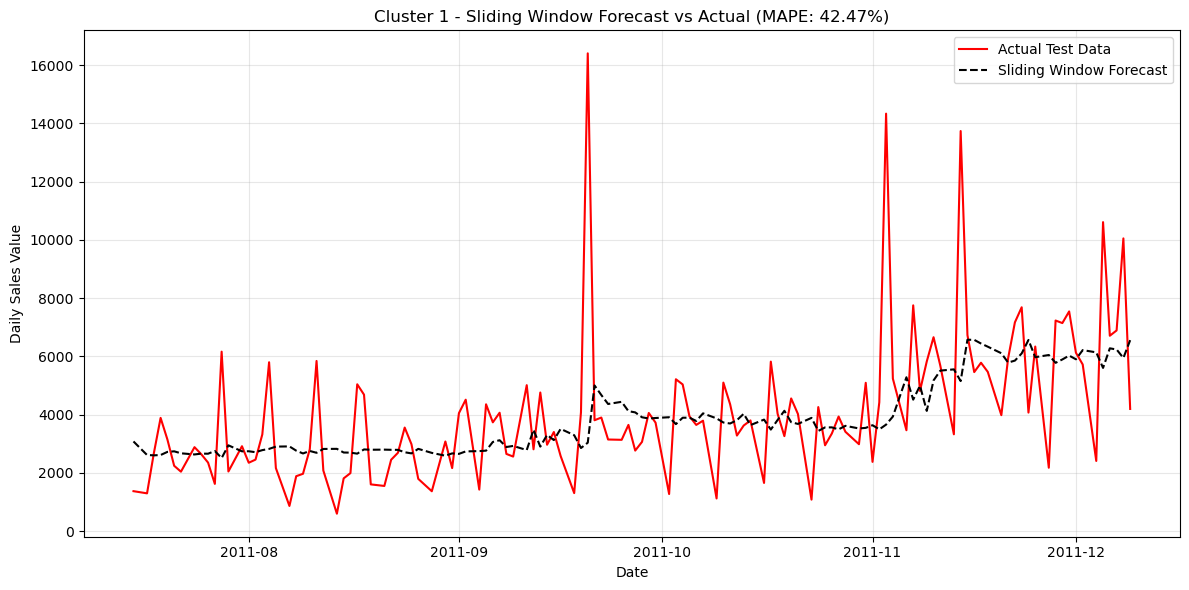

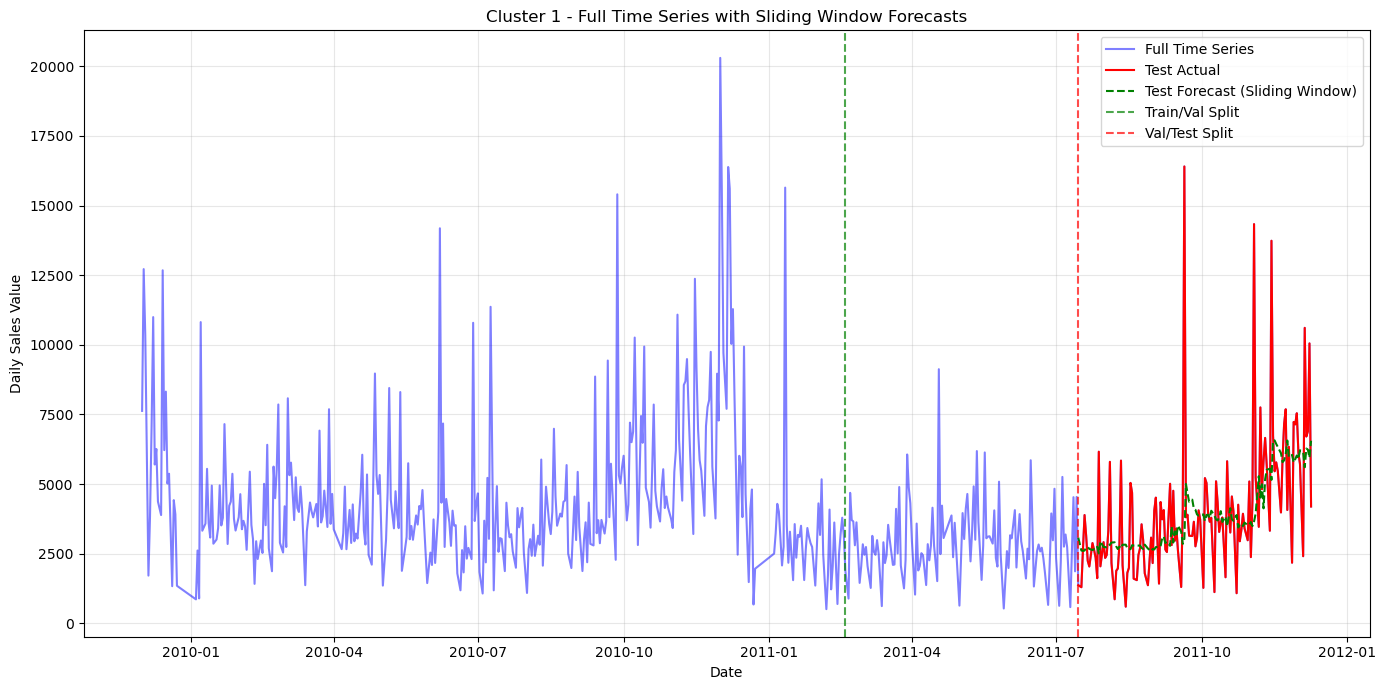


Processing time for Cluster 1: 19.62 seconds


Processing Cluster 2 with Sliding Window (Size: 30)
Daily data points: 604
Train size: 358, Validation size: 120, Test size: 126

Trying model: {'trend': 'add', 'seasonal': 'add', 'damped_trend': True}
  Validation MAPE: 117.5662%, MAE: 1464.3719, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'add', 'damped_trend': False}
  Validation MAPE: 120.0803%, MAE: 1463.4254, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': True}
  Validation MAPE: 117.6676%, MAE: 1489.4195, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}
  Validation MAPE: 120.3313%, MAE: 1574.0464, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': None, 'damped_trend': True}
  Validation MAPE: 112.8642%, MAE: 1182.5560, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': None, 'damped_trend': False}
  Validation MAPE: 108.4792%,

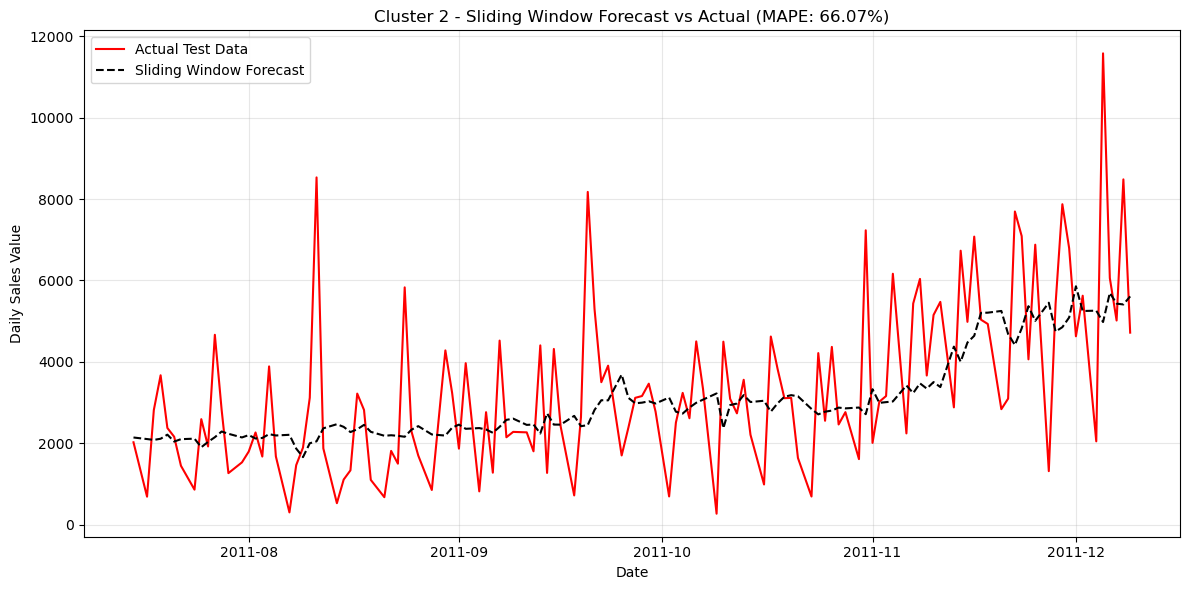

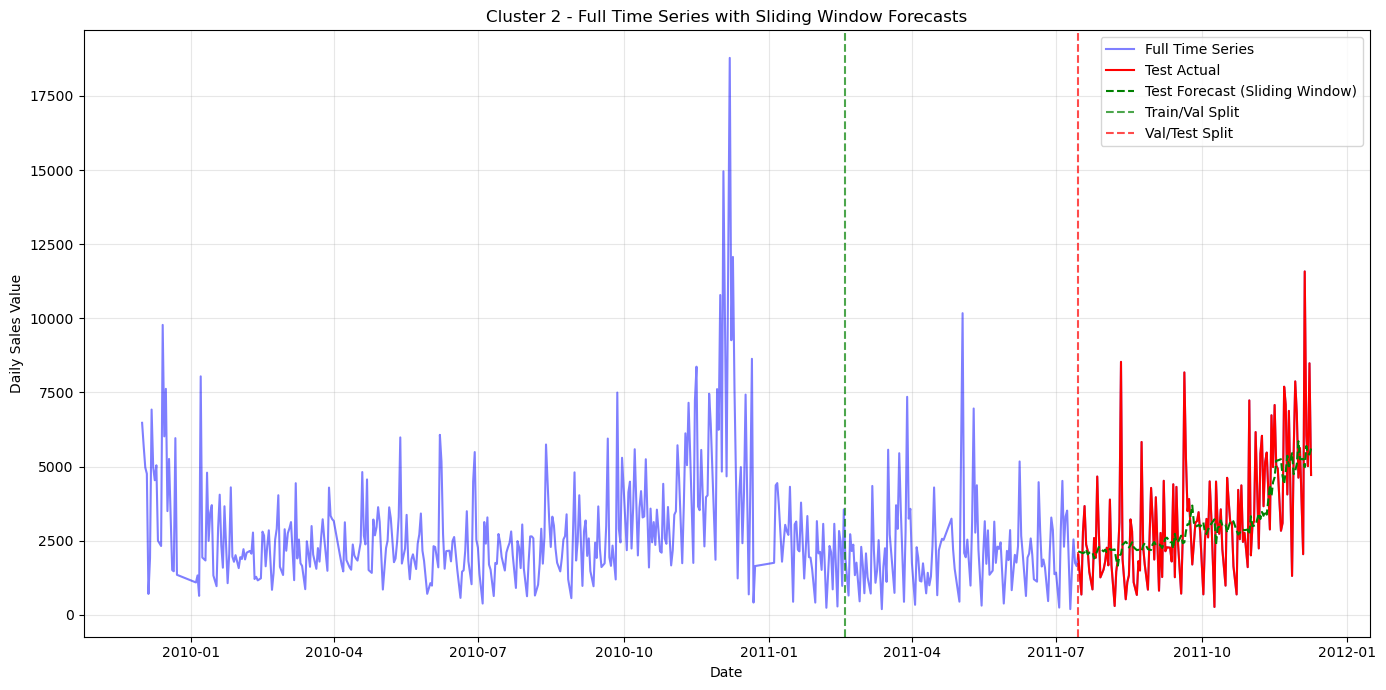


Processing time for Cluster 2: 19.66 seconds


Processing Cluster 0 with Sliding Window (Size: 30)
Daily data points: 604
Train size: 358, Validation size: 120, Test size: 126

Trying model: {'trend': 'add', 'seasonal': 'add', 'damped_trend': True}
  Validation MAPE: 84.0289%, MAE: 1190.0896, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'add', 'damped_trend': False}
  Validation MAPE: 84.0016%, MAE: 1166.2411, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': True}
  Validation MAPE: 85.0228%, MAE: 1245.9675, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}
  Validation MAPE: 82.3359%, MAE: 1263.6825, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': None, 'damped_trend': True}
  Validation MAPE: 65.4052%, MAE: 983.6613, Valid forecasts: 120/120

Trying model: {'trend': 'add', 'seasonal': None, 'damped_trend': False}
  Validation MAPE: 66.4195%, MAE: 9

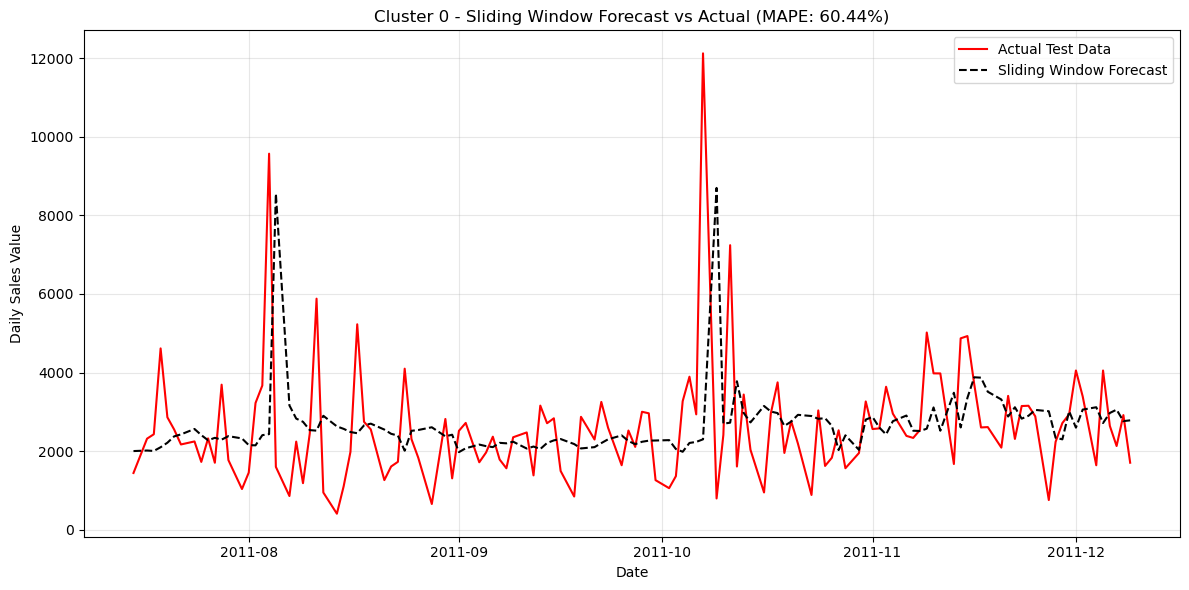

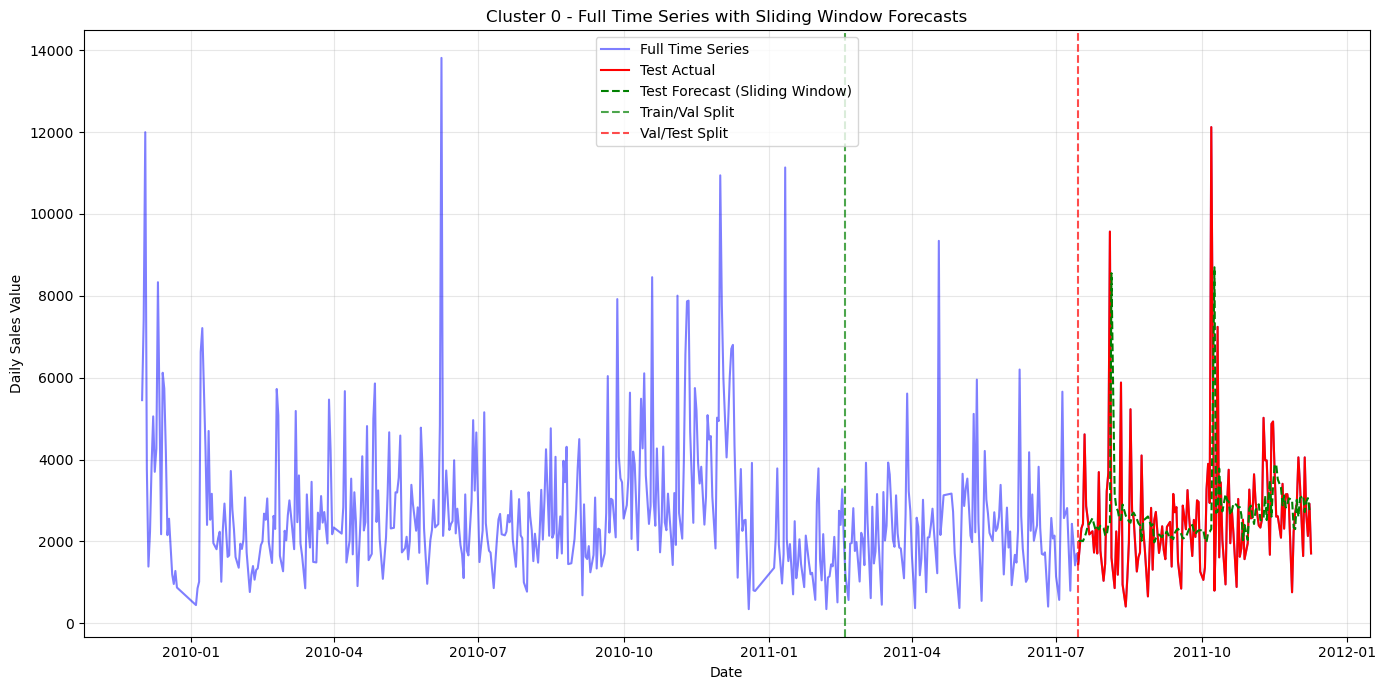


Processing time for Cluster 0: 20.30 seconds

--- Overall Cluster Summary ---
 Cluster  Validation_MAPE  Test_MAPE    Test_MAE   Test_RMSE  Valid_Forecasts
       1        50.463753  42.470319 1380.816653 2263.204715              126
       2        97.599447  66.068369 1298.905442 1798.065770              126
       0        60.669933  60.442234 1102.693273 1833.278047              126

Average Test MAPE across all clusters: 56.3270%


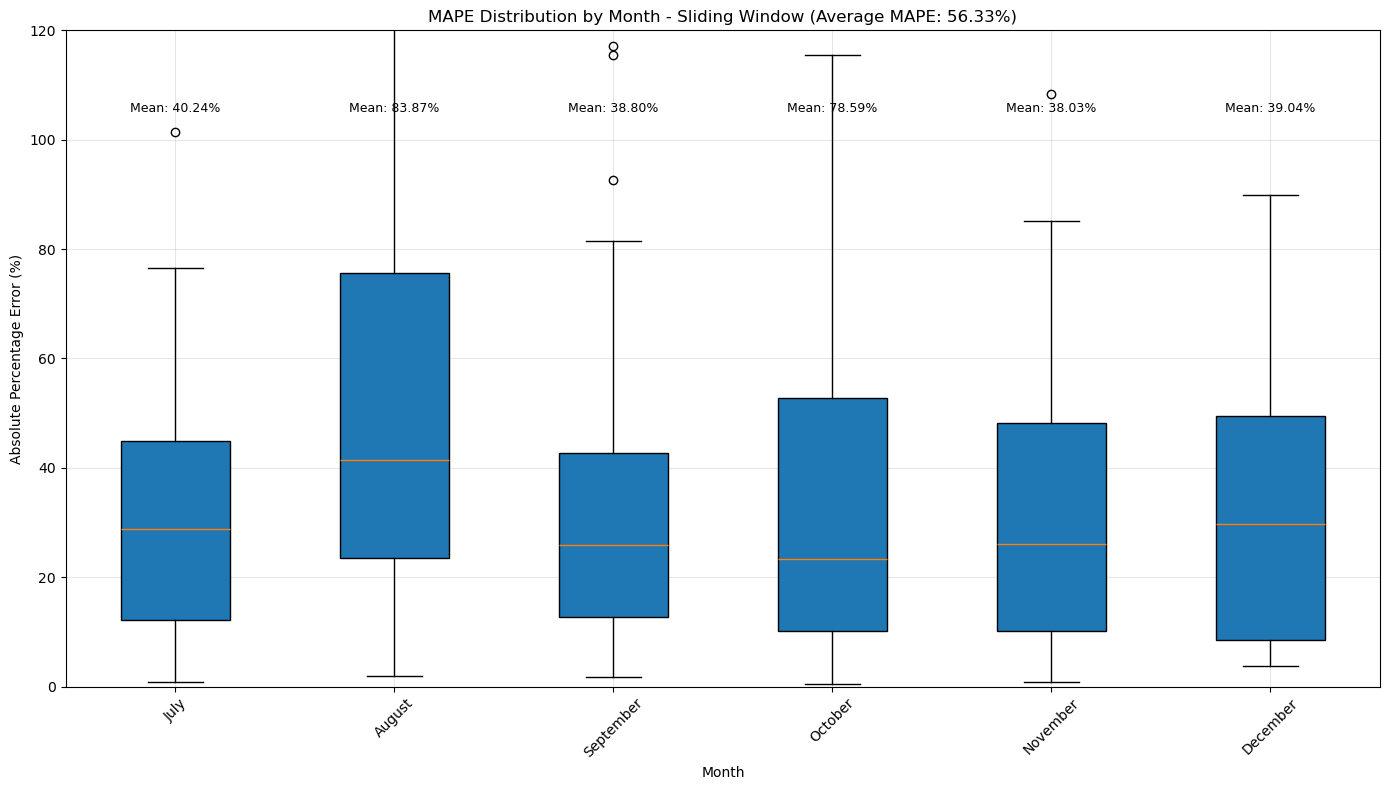


--- Summary Statistics for MAPE by Month ---

July:
  Number of days: 42
  Mean APE: 40.24%
  Median APE: 28.79%
  Min APE: 0.80%
  Max APE: 206.43%
  Standard Deviation: 43.08%

August:
  Number of days: 78
  Mean APE: 83.87%
  Median APE: 41.34%
  Min APE: 1.84%
  Max APE: 639.67%
  Standard Deviation: 120.71%

September:
  Number of days: 78
  Mean APE: 38.80%
  Median APE: 25.84%
  Min APE: 1.76%
  Max APE: 273.01%
  Standard Deviation: 44.44%

October:
  Number of days: 78
  Mean APE: 78.59%
  Median APE: 23.29%
  Min APE: 0.46%
  Max APE: 1109.24%
  Standard Deviation: 175.18%

November:
  Number of days: 78
  Mean APE: 38.03%
  Median APE: 26.14%
  Min APE: 0.88%
  Max APE: 315.46%
  Standard Deviation: 51.72%

December:
  Number of days: 24
  Mean APE: 39.04%
  Median APE: 29.77%
  Min APE: 3.68%
  Max APE: 157.05%
  Standard Deviation: 41.68%

Monthly MAPE Summary:
    Month  Number of Days  Mean APE (%)  Median APE (%)  Min APE (%)  Max APE (%)  Std Dev (%)
     July        

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppress warnings
warnings.filterwarnings("ignore")

# Define sliding window size
WINDOW_SIZE = 30  # 30-day sliding window

# Load data
print("Loading data...")
data = pd.read_csv("merged_with_word2vec_clusters.csv")

# Ensure InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate sales value if not already present
if 'SalesValue' not in data.columns:
    data['SalesValue'] = data['Quantity'] * data['Price']

# Filter to only positive values
data = data[data['SalesValue'] > 0]
print(f"Data shape after filtering for positive SalesValue: {data.shape}")

# Store results for final boxplot by month
monthly_ape_values = {}
month_labels = []
ape_values_list = []

# Store overall results for each cluster
cluster_results = []

# Define model parameters to test
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'damped_trend': [True, False]
}
grid = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

# Process for each cluster
clusters = data['word2vec_cluster'].unique()

for cluster in clusters:
    start_time = time.time()
    print(f"\n\n{'='*50}")
    print(f"Processing Cluster {cluster} with Sliding Window (Size: {WINDOW_SIZE})")
    print(f"{'='*50}")
    
    # Filter data for this cluster
    cluster_df = data[data['word2vec_cluster'] == cluster].copy()
    
    # Aggregate by day
    daily_data = cluster_df.groupby(data['InvoiceDate'].dt.floor('D'))['SalesValue'].sum().reset_index()
    daily_data = daily_data.rename(columns={'InvoiceDate': 'ds', 'SalesValue': 'y'})
    daily_data = daily_data.sort_values('ds').dropna(subset=['y'])
    
    # Add month information
    daily_data['Month'] = daily_data['ds'].dt.month_name()
    
    # Check if data exists after preprocessing
    if len(daily_data) < WINDOW_SIZE + 14:  # Need at least window_size + some minimal test data
        print(f"Not enough data points for Cluster {cluster}. Skipping.")
        continue
        
    print(f"Daily data points: {len(daily_data)}")
    
    # Calculate split points for 60% train, 20% validation, 20% test
    total_days = (daily_data['ds'].max() - daily_data['ds'].min()).days
    test_days = int(total_days * 0.20)
    val_days = int(total_days * 0.20)
    
    cutoff_test = daily_data['ds'].max() - pd.Timedelta(days=test_days)
    cutoff_val = cutoff_test - pd.Timedelta(days=val_days)
    
    # Create the splits
    train_data = daily_data[daily_data['ds'] < cutoff_val].copy()
    val_data = daily_data[(daily_data['ds'] >= cutoff_val) & 
                          (daily_data['ds'] < cutoff_test)].copy()
    test_data = daily_data[daily_data['ds'] >= cutoff_test].copy()
    test_data = test_data.sort_values('ds')
    
    print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")
    
    # Check if we have enough data in each set
    if len(train_data) < WINDOW_SIZE or len(val_data) < 3 or len(test_data) < 3:
        print(f"Not enough data in splits for Cluster {cluster}. Skipping.")
        continue
    
    results_list = []
    
    # Test all parameter combinations using sliding window on validation set
    for params in grid:
        param_dict = dict(zip(param_names, params))
        
        # Skip invalid combinations (can't have damped trend without trend)
        if param_dict['trend'] is None and param_dict['damped_trend'] is True:
            continue
        
        print(f"\nTrying model: {param_dict}")
        
        try:
            # For each day in validation set, create a forecast using the sliding window
            val_forecasts = []
            val_actual = []
            val_dates = []
            
            for i in range(len(val_data)):
                # Get target date to forecast
                target_date = val_data.iloc[i]['ds']
                val_dates.append(target_date)
                
                # Get actual value for this date (for later comparison)
                actual_value = val_data.iloc[i]['y']
                val_actual.append(actual_value)
                
                # Get the window end date (day before target)
                window_end_date = target_date - pd.Timedelta(days=1)
                
                # Get the window start date
                window_start_date = window_end_date - pd.Timedelta(days=WINDOW_SIZE-1)
                
                # Get window data
                window_data = daily_data[
                    (daily_data['ds'] >= window_start_date) &
                    (daily_data['ds'] <= window_end_date)
                ].copy()
                
                # Check if we have sufficient data in the window
                if len(window_data) < 7:  # Minimum needed for reasonable fit
                    val_forecasts.append(np.nan)
                    continue
                
                # Create and fit model on this window
                window_model = ExponentialSmoothing(
                    window_data['y'].values,
                    trend=param_dict['trend'],
                    seasonal=param_dict['seasonal'],
                    seasonal_periods=7 if param_dict['seasonal'] else None,
                    damped_trend=param_dict['damped_trend']
                )
                
                # Try to fit with optimization, fall back if it fails
                try:
                    fitted_model = window_model.fit(optimized=True)
                except:
                    try:
                        fitted_model = window_model.fit(optimized=False)
                    except Exception as e:
                        print(f"  Window fit failed: {e}")
                        val_forecasts.append(np.nan)
                        continue
                
                # Generate forecast for the target date
                forecast = fitted_model.forecast(1)[0]
                val_forecasts.append(forecast)
            
            # Convert to numpy arrays
            val_forecasts = np.array(val_forecasts)
            val_actual = np.array(val_actual)
            
            # Remove any NaN values for evaluation
            valid_indices = ~np.isnan(val_forecasts)
            if sum(valid_indices) == 0:
                print(f"  No valid forecasts for {param_dict}. Skipping.")
                continue
                
            valid_forecasts = val_forecasts[valid_indices]
            valid_actual = val_actual[valid_indices]
            valid_dates = [val_dates[i] for i, valid in enumerate(valid_indices) if valid]
            
            # Calculate validation metrics
            safe_actual = np.where(valid_actual < 1e-10, 1e-10, valid_actual)
            val_ape = 100 * np.abs((valid_actual - valid_forecasts) / safe_actual)
            val_mape = np.mean(val_ape)
            val_mae = mean_absolute_error(valid_actual, valid_forecasts)
            val_rmse = np.sqrt(mean_squared_error(valid_actual, valid_forecasts))
            
            print(f"  Validation MAPE: {val_mape:.4f}%, MAE: {val_mae:.4f}, Valid forecasts: {sum(valid_indices)}/{len(val_forecasts)}")
            
            # Store the results
            results_list.append({
                'params': param_dict,
                'MAPE': val_mape,
                'MAE': val_mae,
                'RMSE': val_rmse,
                'ValidForecasts': sum(valid_indices),
                'Forecasts': valid_forecasts,
                'Actual': valid_actual,
                'Dates': valid_dates
            })
            
        except Exception as e:
            print(f"  Error with params {param_dict}: {e}")
    
    # Select best model based on validation MAPE
    if not results_list:
        print(f"No successful models for Cluster {cluster}")
        continue
    
    # Convert to DataFrame for easier handling
    results_df = pd.DataFrame([
        {
            'params': str(r['params']),
            'MAPE': r['MAPE'],
            'MAE': r['MAE'],
            'RMSE': r['RMSE'],
            'ValidForecasts': r['ValidForecasts']
        } for r in results_list
    ])
    
    # Find the best model
    best_idx = results_df['MAPE'].idxmin()
    best_params = results_list[best_idx]['params']
    
    print("\nBest Parameters Found (from validation set):")
    print(results_df.sort_values('MAPE').head().to_string(index=False))
    print(f"\nBest model: {best_params}")
    print(f"Validation MAPE: {results_list[best_idx]['MAPE']:.4f}%")
    
    # Apply the best model to the test set using sliding window
    try:
        # For each day in test set, create a forecast using the sliding window
        test_forecasts = []
        test_actual = []
        test_dates = []
        test_ape_values = []
        
        for i in range(len(test_data)):
            # Get target date to forecast
            target_date = test_data.iloc[i]['ds']
            test_dates.append(target_date)
            
            # Get actual value for this date (for later comparison)
            actual_value = test_data.iloc[i]['y']
            test_actual.append(actual_value)
            
            # Get the window end date (day before target)
            window_end_date = target_date - pd.Timedelta(days=1)
            
            # Get the window start date
            window_start_date = window_end_date - pd.Timedelta(days=WINDOW_SIZE-1)
            
            # Get window data
            window_data = daily_data[
                (daily_data['ds'] >= window_start_date) &
                (daily_data['ds'] <= window_end_date)
            ].copy()
            
            # Check if we have sufficient data in the window
            if len(window_data) < 7:  # Minimum needed for reasonable fit
                test_forecasts.append(np.nan)
                test_ape_values.append(np.nan)
                continue
            
            # Create and fit model on this window with best parameters
            window_model = ExponentialSmoothing(
                window_data['y'].values,
                trend=best_params['trend'],
                seasonal=best_params['seasonal'],
                seasonal_periods=7 if best_params['seasonal'] else None,
                damped_trend=best_params['damped_trend']
            )
            
            # Try to fit with optimization, fall back if it fails
            try:
                fitted_model = window_model.fit(optimized=True)
            except:
                try:
                    fitted_model = window_model.fit(optimized=False)
                except Exception as e:
                    print(f"  Test window fit failed: {e}")
                    test_forecasts.append(np.nan)
                    test_ape_values.append(np.nan)
                    continue
            
            # Generate forecast for the target date
            forecast = fitted_model.forecast(1)[0]
            test_forecasts.append(forecast)
            
            # Calculate APE for this forecast
            if actual_value < 1e-10:
                safe_actual = 1e-10
            else:
                safe_actual = actual_value
                
            ape = 100 * np.abs((actual_value - forecast) / safe_actual)
            test_ape_values.append(ape)
        
        # Convert to numpy arrays
        test_forecasts = np.array(test_forecasts)
        test_actual = np.array(test_actual)
        test_ape_values = np.array(test_ape_values)
        
        # Remove any NaN values for evaluation
        valid_indices = ~np.isnan(test_forecasts)
        if sum(valid_indices) == 0:
            print(f"No valid test forecasts. Skipping.")
            continue
            
        valid_forecasts = test_forecasts[valid_indices]
        valid_actual = test_actual[valid_indices]
        valid_dates = [test_dates[i] for i, valid in enumerate(valid_indices) if valid]
        valid_ape = test_ape_values[valid_indices]
        
        # Calculate test metrics
        test_mape = np.mean(valid_ape)
        test_mae = mean_absolute_error(valid_actual, valid_forecasts)
        test_rmse = np.sqrt(mean_squared_error(valid_actual, valid_forecasts))
        
        print("\n--- Final Test Set Evaluation (Sliding Window) ---")
        print(f"MAPE: {test_mape:.4f}%")
        print(f"MAE : {test_mae:.4f}")
        print(f"RMSE: {test_rmse:.4f}")
        print(f"Valid forecasts: {sum(valid_indices)}/{len(test_forecasts)}")
        
        # Create DataFrame with test results
        test_results_df = pd.DataFrame({
            'Date': valid_dates,
            'Actual': valid_actual,
            'Forecast': valid_forecasts,
            'APE': valid_ape
        })
        
        # Add month information
        test_results_df['Month'] = pd.DatetimeIndex(test_results_df['Date']).month_name()
        
        # Store cluster results
        cluster_result = {
            'Cluster': cluster,
            'Best_Model_Params': str(best_params),
            'Validation_MAPE': results_list[best_idx]['MAPE'],
            'Test_MAPE': test_mape,
            'Test_MAE': test_mae,
            'Test_RMSE': test_rmse,
            'Valid_Forecasts': sum(valid_indices)
        }
        cluster_results.append(cluster_result)
        
        # Store APE values by month for the boxplot
        for month in test_results_df['Month'].unique():
            month_data = test_results_df[test_results_df['Month'] == month]
            
            if month not in monthly_ape_values:
                monthly_ape_values[month] = []
            
            monthly_ape_values[month].extend(month_data['APE'].tolist())
            month_labels.extend([month] * len(month_data))
            ape_values_list.extend(month_data['APE'].tolist())
        
        # Plot test results
        plt.figure(figsize=(12, 6))
        plt.plot(test_results_df['Date'], test_results_df['Actual'], 'r-', label='Actual Test Data')
        plt.plot(test_results_df['Date'], test_results_df['Forecast'], 'k--', label='Sliding Window Forecast')
        plt.title(f'Cluster {cluster} - Sliding Window Forecast vs Actual (MAPE: {test_mape:.2f}%)')
        plt.xlabel('Date')
        plt.ylabel('Daily Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot all data with highlighted test period
        plt.figure(figsize=(14, 7))
        
        # Plot full time series
        plt.plot(daily_data['ds'], daily_data['y'], 'b-', alpha=0.5, label='Full Time Series')
        
        # Highlight test period with forecasts
        plt.plot(test_results_df['Date'], test_results_df['Actual'], 'r-', label='Test Actual')
        plt.plot(test_results_df['Date'], test_results_df['Forecast'], 'g--', label='Test Forecast (Sliding Window)')
        
        # Add vertical lines for train/val/test splits
        plt.axvline(x=cutoff_val, color='g', linestyle='--', alpha=0.7, label='Train/Val Split')
        plt.axvline(x=cutoff_test, color='r', linestyle='--', alpha=0.7, label='Val/Test Split')
        
        plt.title(f'Cluster {cluster} - Full Time Series with Sliding Window Forecasts')
        plt.xlabel('Date')
        plt.ylabel('Daily Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error in final model fitting/evaluation: {e}")
    
    end_time = time.time()
    print(f"\nProcessing time for Cluster {cluster}: {(end_time - start_time):.2f} seconds")

# Create summary DataFrame for all clusters
if cluster_results:
    cluster_summary = pd.DataFrame(cluster_results)
    print("\n--- Overall Cluster Summary ---")
    print(cluster_summary[['Cluster', 'Validation_MAPE', 'Test_MAPE', 'Test_MAE', 'Test_RMSE', 'Valid_Forecasts']].to_string(index=False))
    
    # Calculate average MAPE across all clusters
    avg_mape = cluster_summary['Test_MAPE'].mean()
    print(f"\nAverage Test MAPE across all clusters: {avg_mape:.4f}%")

# Create monthly boxplots if we have data
if monthly_ape_values:
    # Define month order for proper sorting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Filter to only include months that exist in our data
    valid_months = [month for month in month_order if month in monthly_ape_values]
    
    # Create a side-by-side boxplot using matplotlib
    plt.figure(figsize=(14, 8))
    
    # Filter and order the monthly_ape_values dictionary
    ordered_monthly_ape = [monthly_ape_values[month] for month in valid_months if month in monthly_ape_values]
    
    # Create boxplot
    boxplot = plt.boxplot(ordered_monthly_ape, labels=valid_months, vert=True, patch_artist=True)
    
    # Calculate and display mean MAPE for each month
    mean_mapes = [np.mean(monthly_ape_values[month]) for month in valid_months if month in monthly_ape_values]
    for i, mean_mape in enumerate(mean_mapes):
        plt.text(i+1, 105, f'Mean: {mean_mape:.2f}%', ha='center', fontsize=9)
    
    plt.title(f'MAPE Distribution by Month - Sliding Window (Average MAPE: {avg_mape:.2f}%)')
    plt.ylabel('Absolute Percentage Error (%)')
    plt.xlabel('Month')
    plt.ylim(0, 120)  # Extended to show the mean values above
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Summary statistics for APEs by month
    print("\n--- Summary Statistics for MAPE by Month ---")
    monthly_summary = []
    for month in valid_months:
        if month in monthly_ape_values and len(monthly_ape_values[month]) > 0:
            values = monthly_ape_values[month]
            monthly_summary.append({
                'Month': month,
                'Number of Days': len(values),
                'Mean APE (%)': np.mean(values),
                'Median APE (%)': np.median(values),
                'Min APE (%)': np.min(values),
                'Max APE (%)': np.max(values),
                'Std Dev (%)': np.std(values)
            })
            print(f"\n{month}:")
            print(f"  Number of days: {len(values)}")
            print(f"  Mean APE: {np.mean(values):.2f}%")
            print(f"  Median APE: {np.median(values):.2f}%")
            print(f"  Min APE: {np.min(values):.2f}%")
            print(f"  Max APE: {np.max(values):.2f}%")
            print(f"  Standard Deviation: {np.std(values):.2f}%")
    
    # Create a summary table as DataFrame
    if monthly_summary:
        monthly_summary_df = pd.DataFrame(monthly_summary)
        print("\nMonthly MAPE Summary:")
        print(monthly_summary_df.to_string(index=False))
else:
    print("\nNo monthly data available for analysis.")

## Method 2: Weekly Exponential Smoothing Without Sliding Window

Loading data...
Data shape after filtering for positive SalesValue: (298881, 15)


Processing Cluster 1 - Weekly Aggregation
Weekly data points: 104
Train size: 64, Validation size: 20, Test size: 20
Tried Trend: add, Seasonal: add (Period: 13), Damped: True, Validation MAPE: 25.2421%
Tried Trend: add, Seasonal: add (Period: 13), Damped: False, Validation MAPE: 33.6731%
Tried Trend: add, Seasonal: mul (Period: 13), Damped: True, Validation MAPE: 20.8794%
Tried Trend: add, Seasonal: mul (Period: 13), Damped: False, Validation MAPE: 28.4373%
Tried Trend: add, Seasonal: None (Period: None), Damped: True, Validation MAPE: 82.0239%
Tried Trend: add, Seasonal: None (Period: None), Damped: False, Validation MAPE: 69.3047%
Tried Trend: mul, Seasonal: add (Period: 13), Damped: True, Validation MAPE: 18.0882%
Tried Trend: mul, Seasonal: add (Period: 13), Damped: False, Validation MAPE: 25.4606%
Tried Trend: mul, Seasonal: mul (Period: 13), Damped: True, Validation MAPE: 14.9986%
Tried Trend: mul

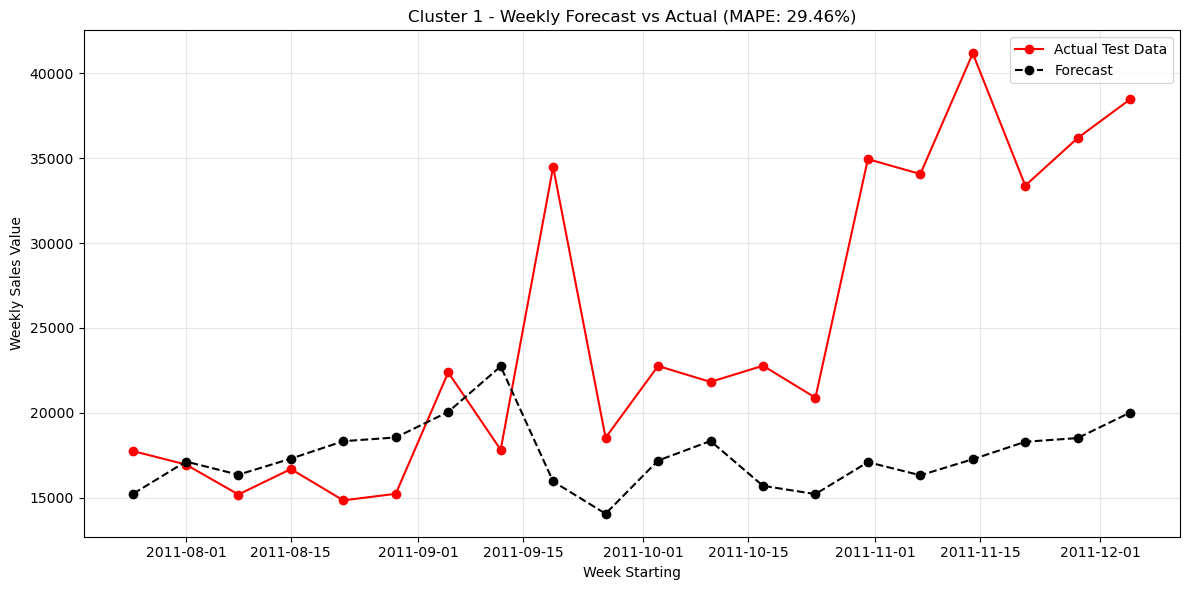

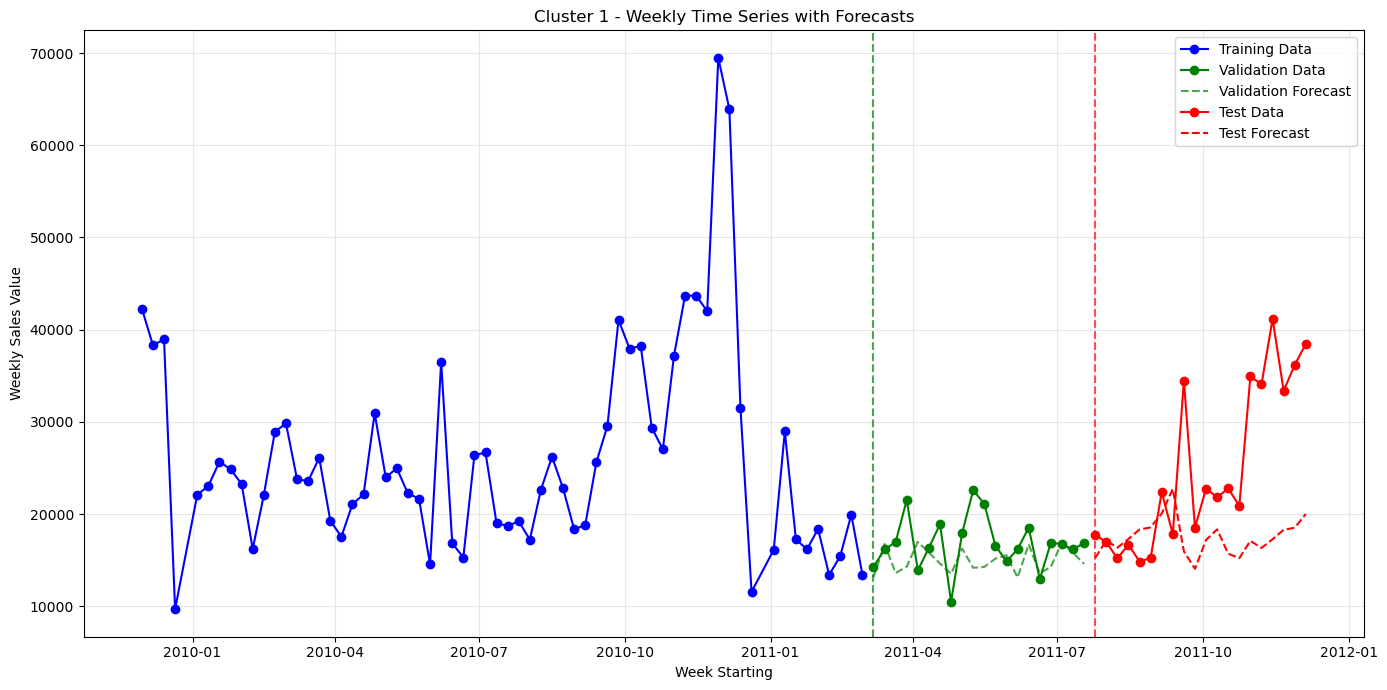


Processing time for Cluster 1: 0.48 seconds


Processing Cluster 2 - Weekly Aggregation
Weekly data points: 104
Train size: 64, Validation size: 20, Test size: 20
Tried Trend: add, Seasonal: add (Period: 13), Damped: True, Validation MAPE: 38.6394%
Tried Trend: add, Seasonal: add (Period: 13), Damped: False, Validation MAPE: 53.3256%
Tried Trend: add, Seasonal: mul (Period: 13), Damped: True, Validation MAPE: 39.8172%
Tried Trend: add, Seasonal: mul (Period: 13), Damped: False, Validation MAPE: 53.8752%
Tried Trend: add, Seasonal: None (Period: None), Damped: True, Validation MAPE: 62.3991%
Tried Trend: add, Seasonal: None (Period: None), Damped: False, Validation MAPE: 88.5363%
Tried Trend: mul, Seasonal: add (Period: 13), Damped: True, Validation MAPE: 30.2307%
Tried Trend: mul, Seasonal: add (Period: 13), Damped: False, Validation MAPE: 39.4318%
Tried Trend: mul, Seasonal: mul (Period: 13), Damped: True, Validation MAPE: 25.5571%
Tried Trend: mul, Seasonal: mul (Period: 13), Damped

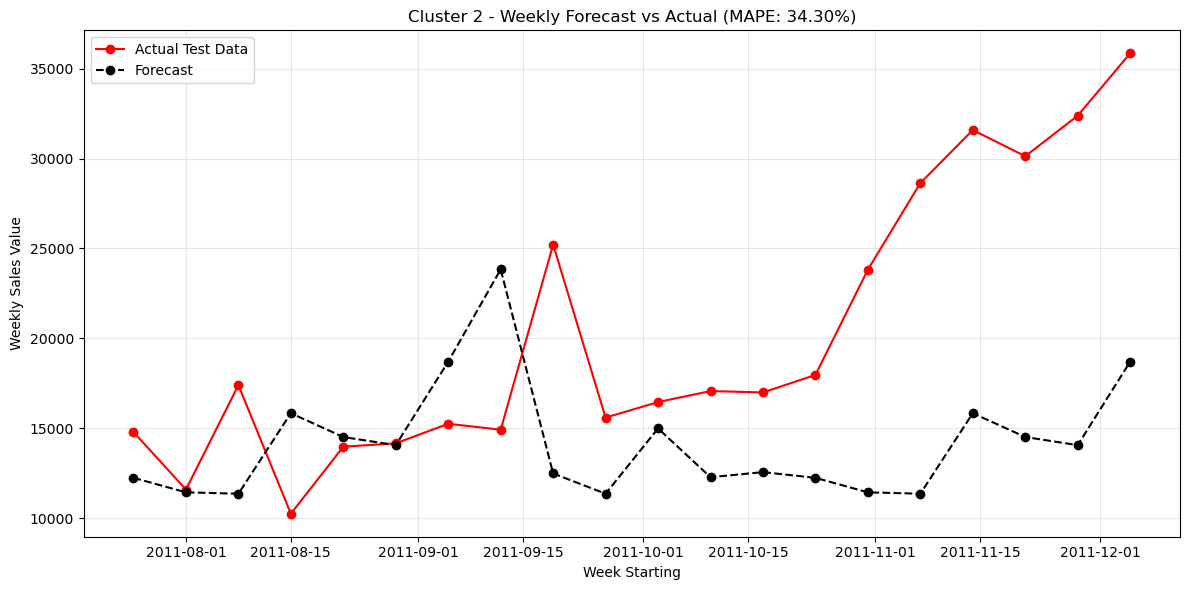

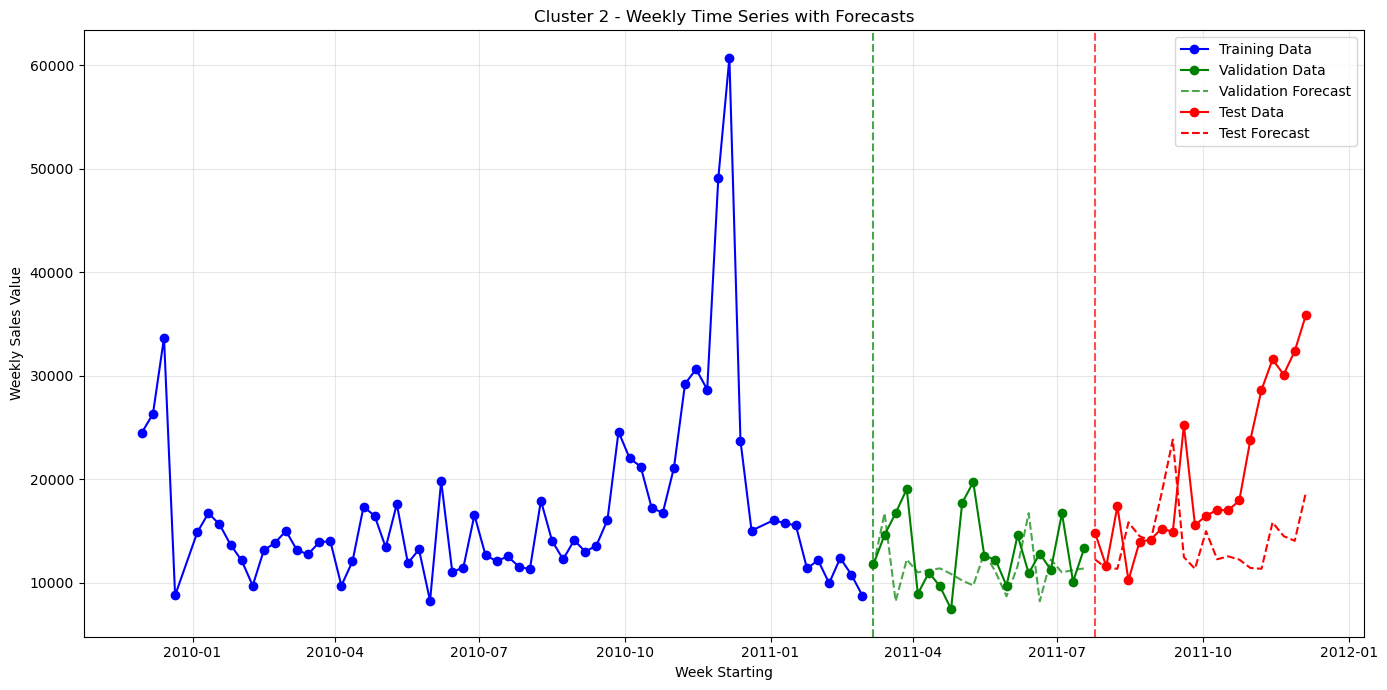


Processing time for Cluster 2: 0.41 seconds


Processing Cluster 0 - Weekly Aggregation
Weekly data points: 104
Train size: 64, Validation size: 20, Test size: 20
Tried Trend: add, Seasonal: add (Period: 13), Damped: True, Validation MAPE: 26.6124%
Tried Trend: add, Seasonal: add (Period: 13), Damped: False, Validation MAPE: 63.0375%
Tried Trend: add, Seasonal: mul (Period: 13), Damped: True, Validation MAPE: 25.1916%
Tried Trend: add, Seasonal: mul (Period: 13), Damped: False, Validation MAPE: 28.0973%
Tried Trend: add, Seasonal: None (Period: None), Damped: True, Validation MAPE: 39.5921%
Tried Trend: add, Seasonal: None (Period: None), Damped: False, Validation MAPE: 45.8742%
Tried Trend: mul, Seasonal: add (Period: 13), Damped: True, Validation MAPE: 23.6452%
Tried Trend: mul, Seasonal: add (Period: 13), Damped: False, Validation MAPE: 27.9508%
Tried Trend: mul, Seasonal: mul (Period: 13), Damped: True, Validation MAPE: 22.5571%
Tried Trend: mul, Seasonal: mul (Period: 13), Damped

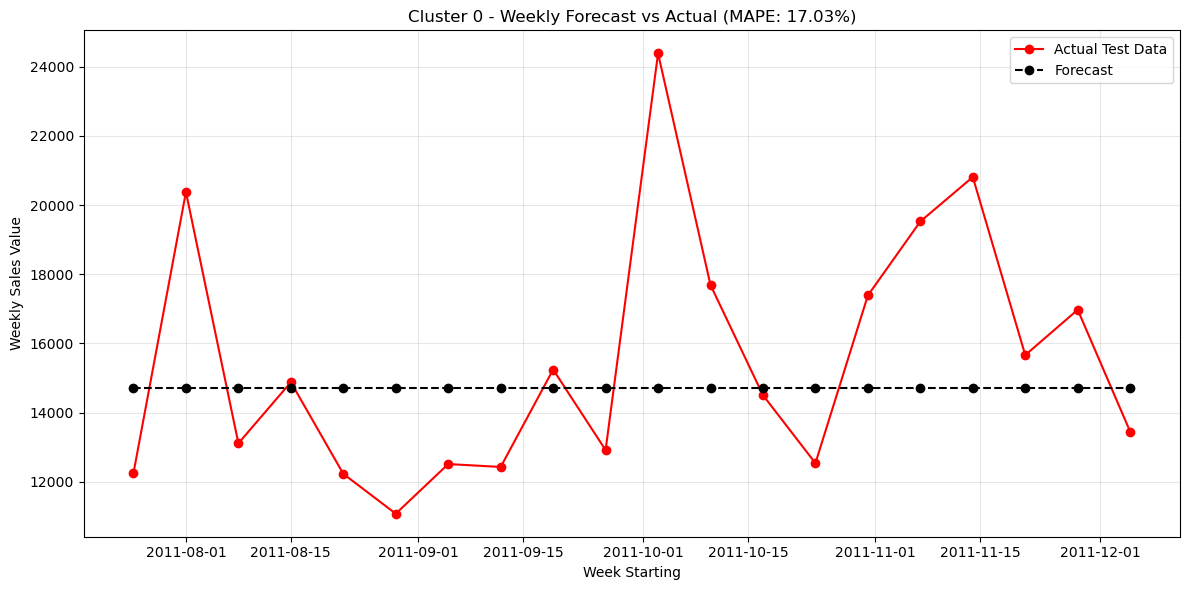

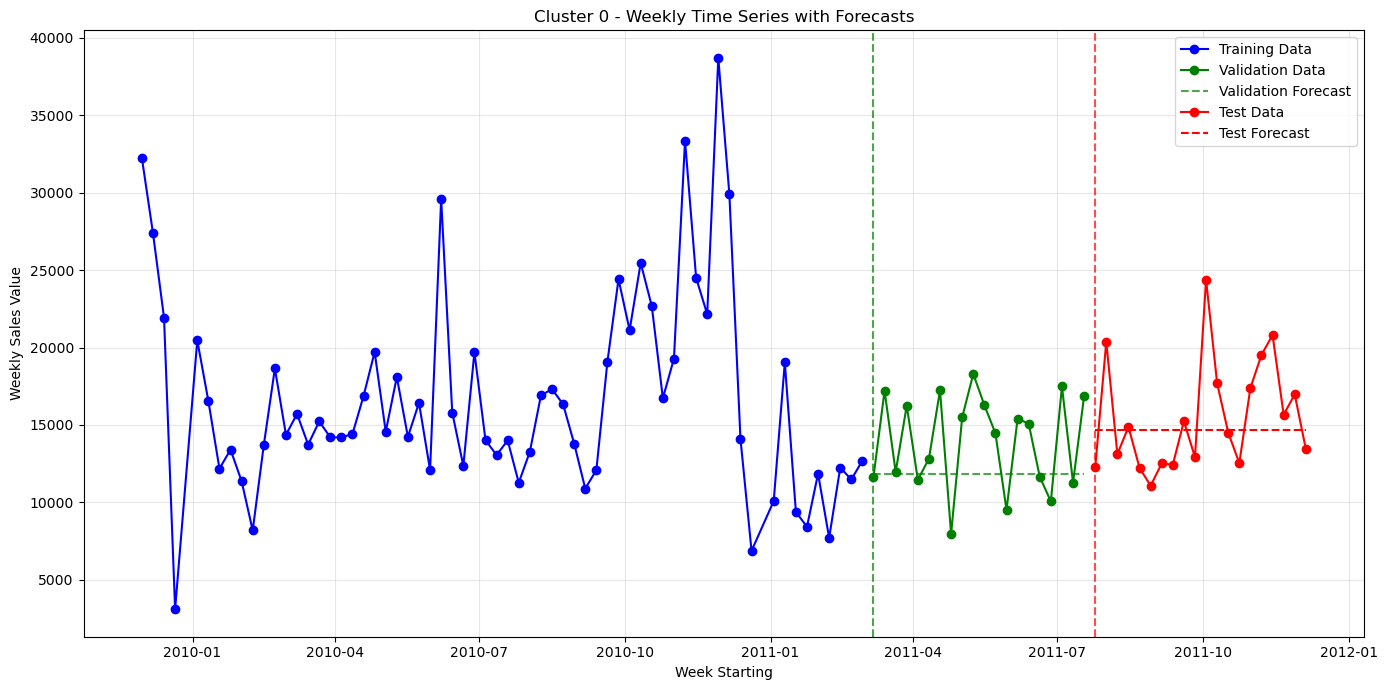


Processing time for Cluster 0: 0.43 seconds

--- Overall Cluster Summary ---
 Cluster  Validation_MAPE  Test_MAPE    Test_MAE    Test_RMSE
       1        14.998558  29.456530 8695.621914 11471.163866
       2        24.270763  34.301598 7863.588568  9996.208498
       0        20.578867  17.034693 2794.979000  3579.542985

Average Test MAPE across all clusters: 26.9309%


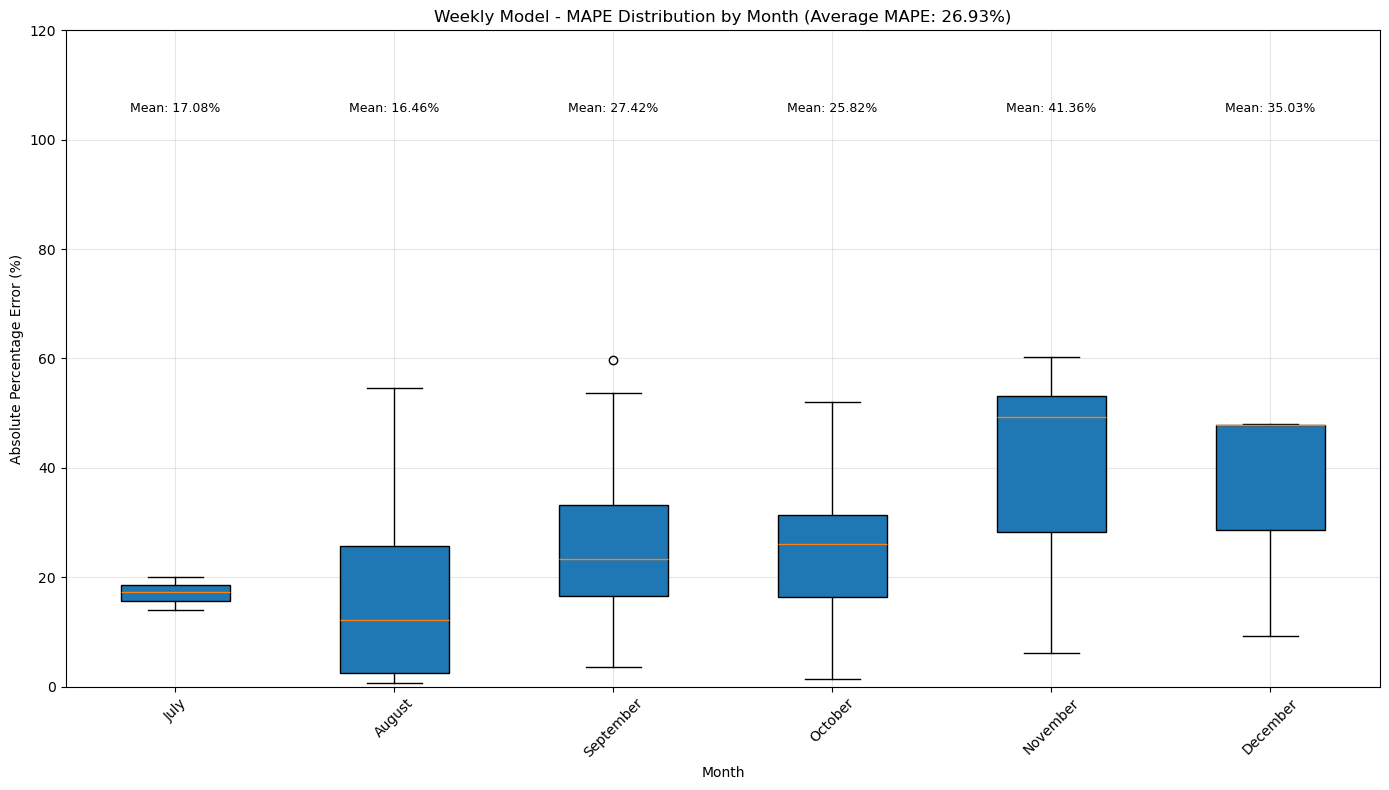


--- Summary Statistics for MAPE by Month ---

July:
  Number of weeks: 3
  Mean APE: 17.08%
  Median APE: 17.24%
  Min APE: 14.06%
  Max APE: 19.95%
  Standard Deviation: 2.41%

August:
  Number of weeks: 15
  Mean APE: 16.46%
  Median APE: 12.11%
  Min APE: 0.72%
  Max APE: 54.58%
  Standard Deviation: 15.57%

September:
  Number of weeks: 12
  Mean APE: 27.42%
  Median APE: 23.40%
  Min APE: 3.57%
  Max APE: 59.79%
  Standard Deviation: 17.16%

October:
  Number of weeks: 15
  Mean APE: 25.82%
  Median APE: 26.09%
  Min APE: 1.35%
  Max APE: 52.00%
  Standard Deviation: 13.74%

November:
  Number of weeks: 12
  Mean APE: 41.36%
  Median APE: 49.35%
  Min APE: 6.14%
  Max APE: 60.35%
  Standard Deviation: 17.52%

December:
  Number of weeks: 3
  Mean APE: 35.03%
  Median APE: 47.84%
  Min APE: 9.30%
  Max APE: 47.95%
  Standard Deviation: 18.19%

Monthly MAPE Summary:
    Month  Number of Weeks  Mean APE (%)  Median APE (%)  Min APE (%)  Max APE (%)  Std Dev (%)
     July            

In [4]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Suppress warnings
warnings.filterwarnings("ignore")

# Load data
print("Loading data...")
data = pd.read_csv("merged_with_word2vec_clusters.csv")

# Ensure InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate sales value if not already present
if 'SalesValue' not in data.columns:
    data['SalesValue'] = data['Quantity'] * data['Price']

# Filter to only positive values
data = data[data['SalesValue'] > 0]
print(f"Data shape after filtering for positive SalesValue: {data.shape}")

# Store results for final boxplot by month
monthly_ape_values = {}
month_labels = []
ape_values_list = []

# Store overall results for each cluster
cluster_results = []

# Define model parameters to test
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'damped_trend': [True, False]
}
grid = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

# Process for each cluster
clusters = data['word2vec_cluster'].unique()

for cluster in clusters:
    start_time = time.time()
    print(f"\n\n{'='*50}")
    print(f"Processing Cluster {cluster} - Weekly Aggregation")
    print(f"{'='*50}")
    
    # Filter data for this cluster
    cluster_df = data[data['word2vec_cluster'] == cluster].copy()
    
    # Add week start date column for grouping
    cluster_df['WeekStart'] = cluster_df['InvoiceDate'].dt.to_period('W').dt.start_time
    
    # Aggregate by week
    weekly_data = cluster_df.groupby('WeekStart')['SalesValue'].sum().reset_index()
    weekly_data = weekly_data.rename(columns={'WeekStart': 'ds', 'SalesValue': 'y'})
    weekly_data = weekly_data.sort_values('ds').dropna(subset=['y'])
    
    # Add month information (for later reporting)
    weekly_data['Month'] = weekly_data['ds'].dt.month_name()
    
    # Check if data exists after preprocessing
    if len(weekly_data) < 12:  # Need at least 12 weeks for meaningful splits
        print(f"Not enough weekly data points for Cluster {cluster}. Skipping.")
        continue
        
    print(f"Weekly data points: {len(weekly_data)}")
    
    # Calculate split points for 60% train, 20% validation, 20% test
    # Note: We're working with week-based periods now
    total_weeks = len(weekly_data)
    test_weeks = int(total_weeks * 0.20)
    val_weeks = int(total_weeks * 0.20)
    train_weeks = total_weeks - test_weeks - val_weeks
    
    # Create the splits based on index since dates are not evenly spaced
    train_data = weekly_data.iloc[:train_weeks].copy()
    val_data = weekly_data.iloc[train_weeks:train_weeks+val_weeks].copy()
    test_data = weekly_data.iloc[train_weeks+val_weeks:].copy()
    
    # Get cutoff dates for visualization
    cutoff_val = val_data.iloc[0]['ds']
    cutoff_test = test_data.iloc[0]['ds']
    
    print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")
    
    # Check if we have enough data in each set
    if len(train_data) < 4 or len(val_data) < 2 or len(test_data) < 2:
        print(f"Not enough data in splits for Cluster {cluster}. Skipping.")
        continue
    
    # Set index for time series modeling
    train_set = train_data.set_index('ds')
    val_set = val_data.set_index('ds')
    test_set = test_data.set_index('ds')
    
    results_list = []
    
    # Test all parameter combinations
    for params in grid:
        param_dict = dict(zip(param_names, params))
        
        # Skip invalid combinations (can't have damped trend without trend)
        if param_dict['trend'] is None and param_dict['damped_trend'] is True:
            continue
        
        try:
            # For weekly data, if using seasonality, a common period is 52 (annual)
            # But we need at least 2*52 weeks for this, so use smaller period if not enough data
            if param_dict['seasonal'] is not None:
                if len(train_data) >= 52*2:
                    seasonal_period = 52  # Annual seasonality
                elif len(train_data) >= 26:
                    seasonal_period = 13  # Quarterly seasonality (13 weeks)
                elif len(train_data) >= 8:
                    seasonal_period = 4   # Monthly seasonality
                else:
                    seasonal_period = None
                    param_dict['seasonal'] = None  # Not enough data for seasonality
            else:
                seasonal_period = None
            
            # Create and fit model on training data
            model = ExponentialSmoothing(
                train_set['y'],
                trend=param_dict['trend'],
                seasonal=param_dict['seasonal'],
                seasonal_periods=seasonal_period,
                damped_trend=param_dict['damped_trend']
            ).fit(optimized=True)
            
            # Forecast validation period
            val_forecast = model.forecast(len(val_set)).reset_index(drop=True)
            
            # Merge actual and forecasted values
            merged = val_set.reset_index(drop=False).copy()
            merged['yhat'] = val_forecast.values
            merged = merged.set_index('ds')
            
            # Calculate APE values with handling for zeros and infinities
            safe_y = merged['y'].replace(0, 1e-10)
            merged['ape'] = 100 * np.abs((merged['y'] - merged['yhat']) / safe_y)
            merged['ape'] = merged['ape'].replace([np.inf, -np.inf], np.nan).fillna(0)
            
            # Calculate validation MAPE
            mape_val = merged['ape'].mean()
            mae_val = mean_absolute_error(merged['y'], merged['yhat'])
            rmse_val = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
            
            model_desc = f"Trend: {param_dict['trend']}, Seasonal: {param_dict['seasonal']} (Period: {seasonal_period}), Damped: {param_dict['damped_trend']}"
            print(f"Tried {model_desc}, Validation MAPE: {mape_val:.4f}%")
            
            # Store results
            results_list.append({
                'params': param_dict,
                'seasonal_period': seasonal_period,
                'MAPE': mape_val,
                'MAE': mae_val,
                'RMSE': rmse_val,
                'model': model,
                'model_desc': model_desc
            })
            
        except Exception as e:
            print(f"Error with params {param_dict}: {e}")
    
    # Select best model based on validation MAPE
    if not results_list:
        print(f"No successful models for Cluster {cluster}")
        continue
    
    results_df = pd.DataFrame([
        {
            'Model': r['model_desc'],
            'MAPE': r['MAPE'],
            'MAE': r['MAE'],
            'RMSE': r['RMSE']
        } for r in results_list
    ])
    
    best_idx = np.argmin([r['MAPE'] for r in results_list])
    best_result = results_list[best_idx]
    
    print("\nBest Parameters Found (from validation set):")
    print(results_df.sort_values('MAPE').head().to_string(index=False))
    print(f"\nBest model: {best_result['model_desc']}")
    print(f"Validation MAPE: {best_result['MAPE']:.4f}%")
    
    # Refit on combined train + validation data
    full_train = pd.concat([train_data, val_data])
    full_train = full_train.sort_values('ds').set_index('ds')
    
    try:
        # Create and fit best model on combined data
        refit_model = ExponentialSmoothing(
            full_train['y'],
            trend=best_result['params']['trend'],
            seasonal=best_result['params']['seasonal'],
            seasonal_periods=best_result['seasonal_period'],
            damped_trend=best_result['params']['damped_trend']
        ).fit(optimized=True)
        
        # Forecast test period
        test_forecast = refit_model.forecast(len(test_set)).reset_index(drop=True)
        
        # Prepare test evaluation DataFrame
        test_eval = test_set.copy().reset_index(drop=False)
        test_eval['yhat'] = test_forecast.values
        test_eval = test_eval.set_index('ds')
        
        # Calculate test metrics
        safe_y = test_eval['y'].replace(0, 1e-10)
        test_eval['ape'] = 100 * np.abs((test_eval['y'] - test_eval['yhat']) / safe_y)
        test_eval['ape'] = test_eval['ape'].replace([np.inf, -np.inf], np.nan).fillna(0)
        
        mape_test = test_eval['ape'].mean()
        mae_test = mean_absolute_error(test_eval['y'], test_eval['yhat'])
        rmse_test = np.sqrt(mean_squared_error(test_eval['y'], test_eval['yhat']))
        
        print("\n--- Final Test Set Evaluation (Weekly Model) ---")
        print(f"MAPE: {mape_test:.4f}%")
        print(f"MAE : {mae_test:.4f}")
        print(f"RMSE: {rmse_test:.4f}")
        
        # Store cluster results
        cluster_result = {
            'Cluster': cluster,
            'Best_Model': best_result['model_desc'],
            'Validation_MAPE': best_result['MAPE'],
            'Test_MAPE': mape_test,
            'Test_MAE': mae_test,
            'Test_RMSE': rmse_test
        }
        cluster_results.append(cluster_result)
        
        # Store APE values by month for the boxplot
        test_eval_with_month = test_eval.reset_index()
        test_eval_with_month['Month'] = test_eval_with_month['ds'].dt.month_name()
        
        for month in test_eval_with_month['Month'].unique():
            month_data = test_eval_with_month[test_eval_with_month['Month'] == month]
            
            if month not in monthly_ape_values:
                monthly_ape_values[month] = []
            
            monthly_ape_values[month].extend(month_data['ape'].tolist())
            month_labels.extend([month] * len(month_data))
            ape_values_list.extend(month_data['ape'].tolist())
        
        # Plot test results
        plt.figure(figsize=(12, 6))
        plt.plot(test_eval.index, test_eval['y'], 'ro-', label='Actual Test Data')
        plt.plot(test_eval.index, test_eval['yhat'], 'ko--', label='Forecast')
        plt.title(f'Cluster {cluster} - Weekly Forecast vs Actual (MAPE: {mape_test:.2f}%)')
        plt.xlabel('Week Starting')
        plt.ylabel('Weekly Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot full results
        plt.figure(figsize=(14, 7))
        
        # Plot training data
        train_plot = train_data.set_index('ds')
        plt.plot(train_plot.index, train_plot['y'], 'bo-', label='Training Data')
        
        # Plot validation data and best model forecast on validation
        val_plot = val_data.set_index('ds')
        val_forecast = best_result['model'].forecast(len(val_plot))
        plt.plot(val_plot.index, val_plot['y'], 'go-', label='Validation Data')
        plt.plot(val_plot.index, val_forecast, 'g--', alpha=0.7, label='Validation Forecast')
        
        # Plot test data and forecast
        plt.plot(test_eval.index, test_eval['y'], 'ro-', label='Test Data')
        plt.plot(test_eval.index, test_eval['yhat'], 'r--', label='Test Forecast')
        
        # Add vertical lines for train/val/test splits
        plt.axvline(x=cutoff_val, color='g', linestyle='--', alpha=0.7)
        plt.axvline(x=cutoff_test, color='r', linestyle='--', alpha=0.7)
        
        plt.title(f'Cluster {cluster} - Weekly Time Series with Forecasts')
        plt.xlabel('Week Starting')
        plt.ylabel('Weekly Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error in final model fitting/evaluation: {e}")
    
    end_time = time.time()
    print(f"\nProcessing time for Cluster {cluster}: {(end_time - start_time):.2f} seconds")

# Create summary DataFrame for all clusters
if cluster_results:
    cluster_summary = pd.DataFrame(cluster_results)
    print("\n--- Overall Cluster Summary ---")
    print(cluster_summary[['Cluster', 'Validation_MAPE', 'Test_MAPE', 'Test_MAE', 'Test_RMSE']].to_string(index=False))
    
    # Calculate average MAPE across all clusters
    avg_mape = cluster_summary['Test_MAPE'].mean()
    print(f"\nAverage Test MAPE across all clusters: {avg_mape:.4f}%")

# Create monthly boxplots if we have data
if monthly_ape_values:
    # Define month order for proper sorting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Filter to only include months that exist in our data
    valid_months = [month for month in month_order if month in monthly_ape_values]
    
    # Create a side-by-side boxplot using matplotlib
    plt.figure(figsize=(14, 8))
    
    # Filter and order the monthly_ape_values dictionary
    ordered_monthly_ape = [monthly_ape_values[month] for month in valid_months if month in monthly_ape_values]
    
    # Create boxplot
    boxplot = plt.boxplot(ordered_monthly_ape, labels=valid_months, vert=True, patch_artist=True)
    
    # Calculate and display mean MAPE for each month
    mean_mapes = [np.mean(monthly_ape_values[month]) for month in valid_months if month in monthly_ape_values]
    for i, mean_mape in enumerate(mean_mapes):
        plt.text(i+1, 105, f'Mean: {mean_mape:.2f}%', ha='center', fontsize=9)
    
    plt.title(f'Weekly Model - MAPE Distribution by Month (Average MAPE: {avg_mape:.2f}%)')
    plt.ylabel('Absolute Percentage Error (%)')
    plt.xlabel('Month')
    plt.ylim(0, 120)  # Extended to show the mean values above
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Summary statistics for APEs by month
    print("\n--- Summary Statistics for MAPE by Month ---")
    monthly_summary = []
    for month in valid_months:
        if month in monthly_ape_values and len(monthly_ape_values[month]) > 0:
            values = monthly_ape_values[month]
            monthly_summary.append({
                'Month': month,
                'Number of Weeks': len(values),
                'Mean APE (%)': np.mean(values),
                'Median APE (%)': np.median(values),
                'Min APE (%)': np.min(values),
                'Max APE (%)': np.max(values),
                'Std Dev (%)': np.std(values)
            })
            print(f"\n{month}:")
            print(f"  Number of weeks: {len(values)}")
            print(f"  Mean APE: {np.mean(values):.2f}%")
            print(f"  Median APE: {np.median(values):.2f}%")
            print(f"  Min APE: {np.min(values):.2f}%")
            print(f"  Max APE: {np.max(values):.2f}%")
            print(f"  Standard Deviation: {np.std(values):.2f}%")
    
    # Create a summary table as DataFrame
    if monthly_summary:
        monthly_summary_df = pd.DataFrame(monthly_summary)
        print("\nMonthly MAPE Summary:")
        print(monthly_summary_df.to_string(index=False))
else:
    print("\nNo monthly data available for analysis.")

## Method 2: Weekly Exponential Smoothing With Sliding Window

Loading data...
Data shape after filtering for positive SalesValue: (303547, 15)


Processing Cluster 1 - Weekly with Sliding Window
Weekly data points: 104
Train size: 64, Validation size: 20, Test size: 20

Trying model: Trend: add, Seasonal: add, Damped: True
  Validation MAPE: 25.5465%, MAE: 4024.2158, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: add, Damped: False
  Validation MAPE: 23.9891%, MAE: 3815.7147, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: mul, Damped: True
  Validation MAPE: 25.5465%, MAE: 4024.2158, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: mul, Damped: False
  Validation MAPE: 23.9891%, MAE: 3815.7147, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: None, Damped: True
  Validation MAPE: 25.5465%, MAE: 4024.2158, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: None, Damped: False
  Validation MAPE: 23.9891%, MAE: 3815.7147, Valid forecasts: 20/20

Trying model: Trend: mul, Seasonal: add, Damped:

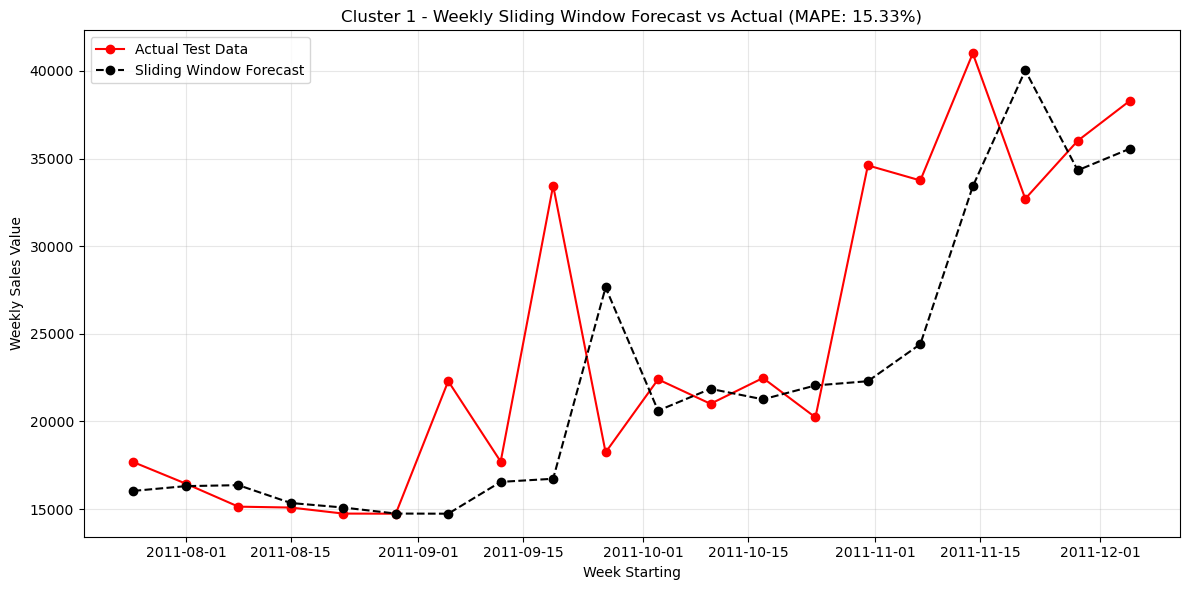

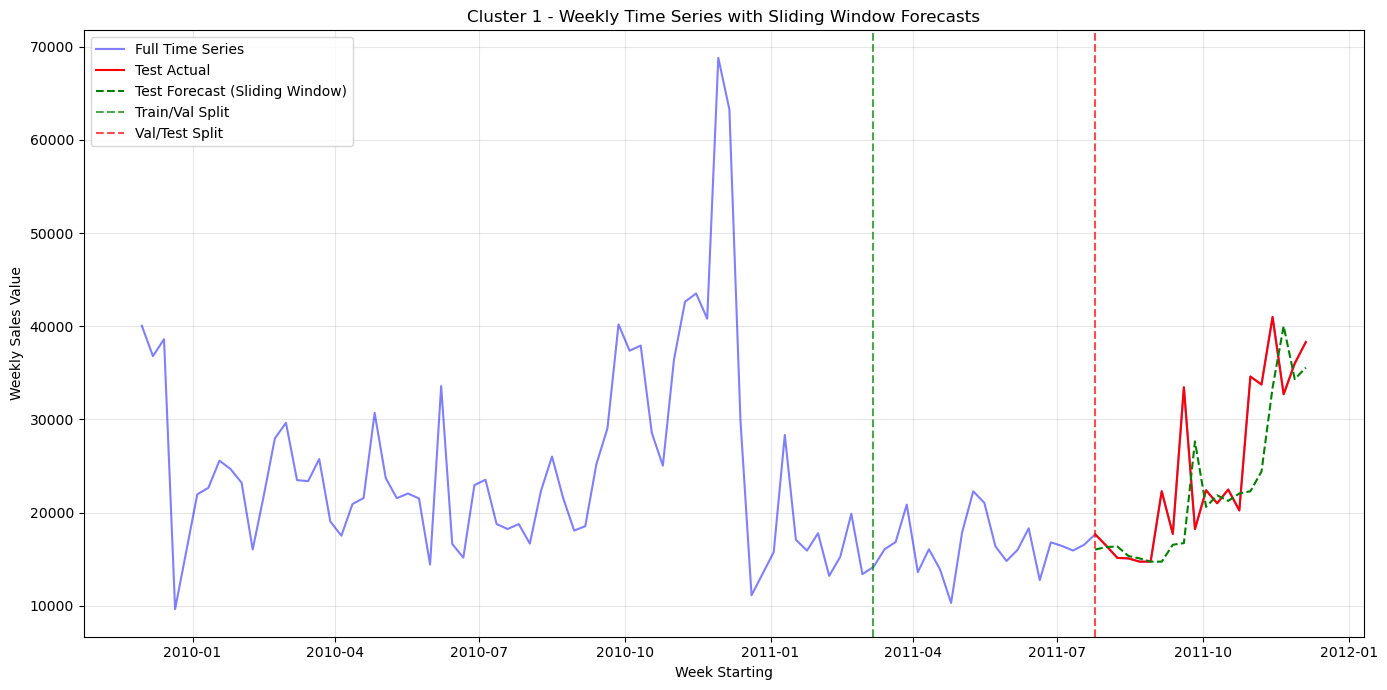


Processing time for Cluster 1: 0.89 seconds


Processing Cluster 2 - Weekly with Sliding Window
Weekly data points: 104
Train size: 64, Validation size: 20, Test size: 20

Trying model: Trend: add, Seasonal: add, Damped: True
  Validation MAPE: 32.1071%, MAE: 3894.0318, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: add, Damped: False
  Validation MAPE: 32.3451%, MAE: 3899.6401, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: mul, Damped: True
  Validation MAPE: 32.1071%, MAE: 3894.0318, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: mul, Damped: False
  Validation MAPE: 32.3451%, MAE: 3899.6401, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: None, Damped: True
  Validation MAPE: 32.1071%, MAE: 3894.0318, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: None, Damped: False
  Validation MAPE: 32.3451%, MAE: 3899.6401, Valid forecasts: 20/20

Trying model: Trend: mul, Seasonal: add, Damped: True
  Validation MAPE: 42.2617%, M

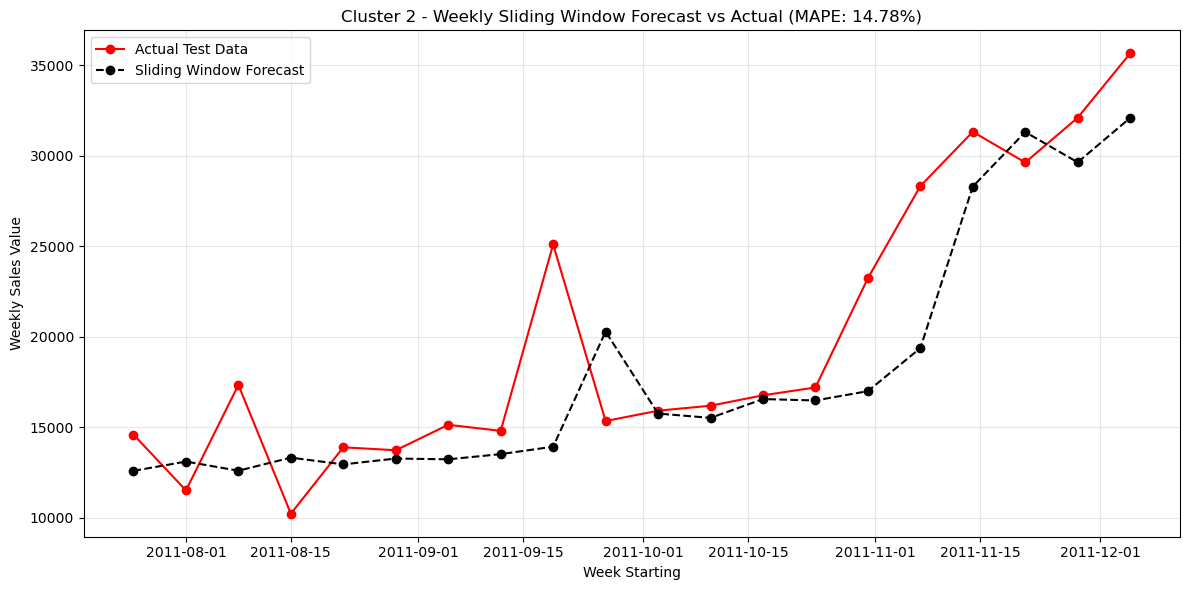

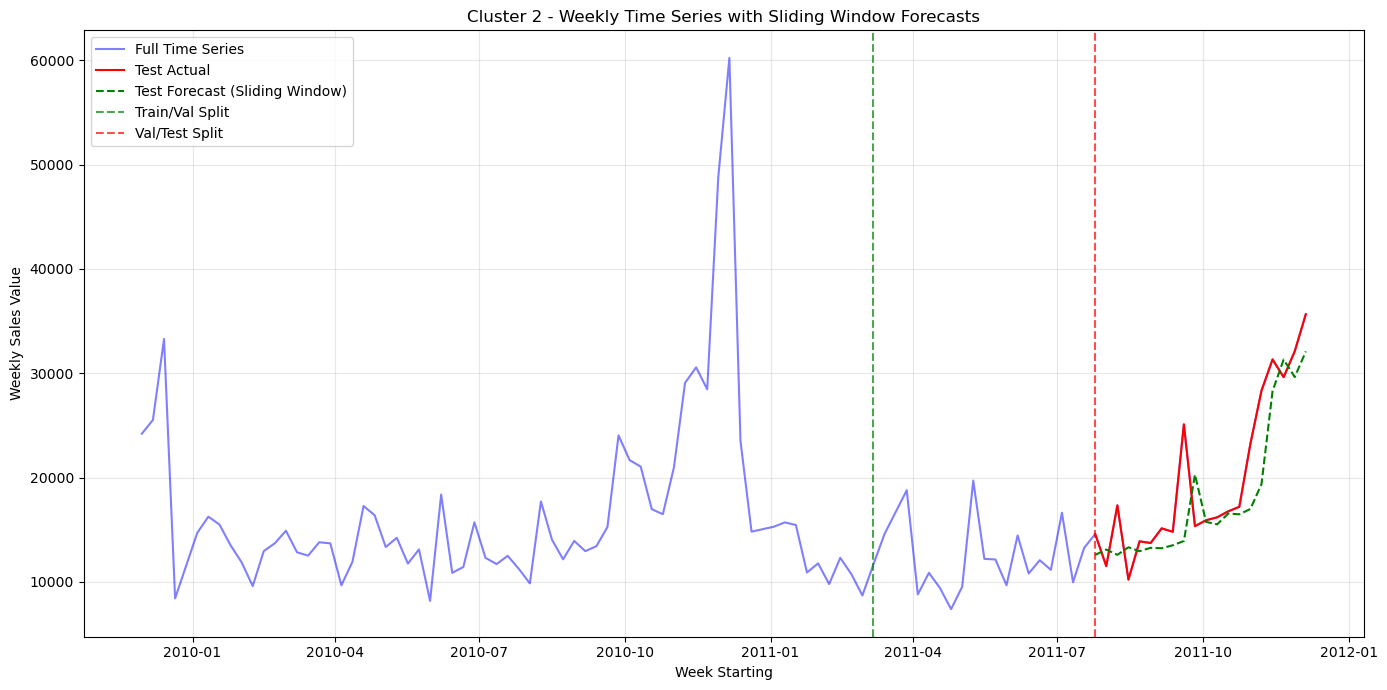


Processing time for Cluster 2: 0.92 seconds


Processing Cluster 0 - Weekly with Sliding Window
Weekly data points: 104
Train size: 64, Validation size: 20, Test size: 20

Trying model: Trend: add, Seasonal: add, Damped: True
  Validation MAPE: 31.8375%, MAE: 4151.7592, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: add, Damped: False
  Validation MAPE: 31.2185%, MAE: 4072.3668, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: mul, Damped: True
  Validation MAPE: 31.8375%, MAE: 4151.7592, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: mul, Damped: False
  Validation MAPE: 31.2185%, MAE: 4072.3668, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: None, Damped: True
  Validation MAPE: 31.8375%, MAE: 4151.7592, Valid forecasts: 20/20

Trying model: Trend: add, Seasonal: None, Damped: False
  Validation MAPE: 31.2185%, MAE: 4072.3668, Valid forecasts: 20/20

Trying model: Trend: mul, Seasonal: add, Damped: True
  Validation MAPE: 33.3430%, M

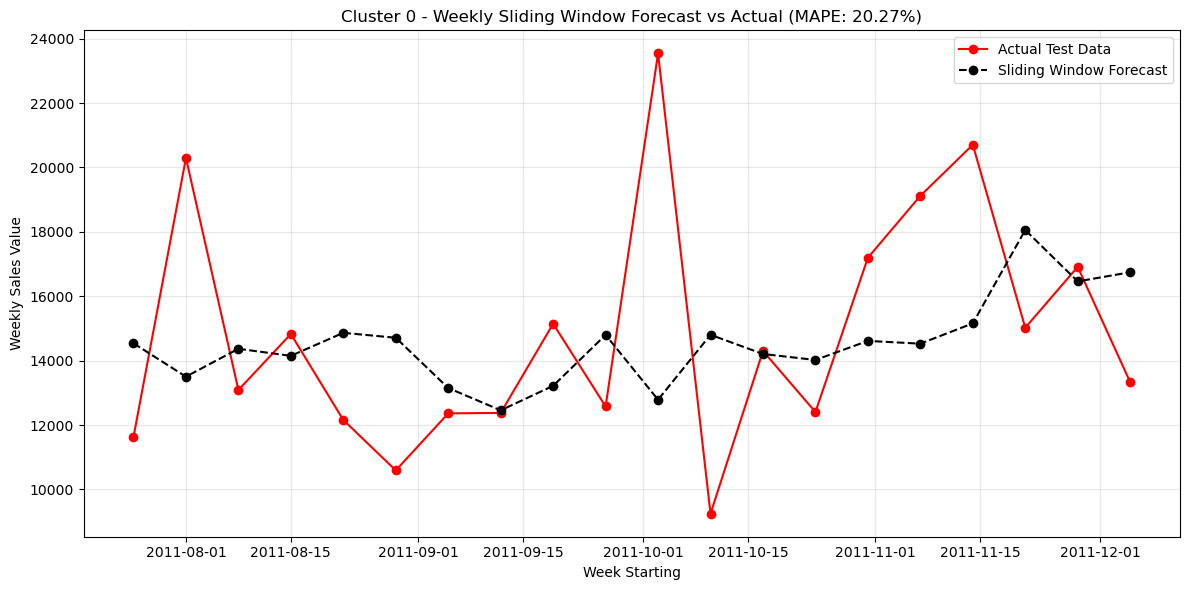

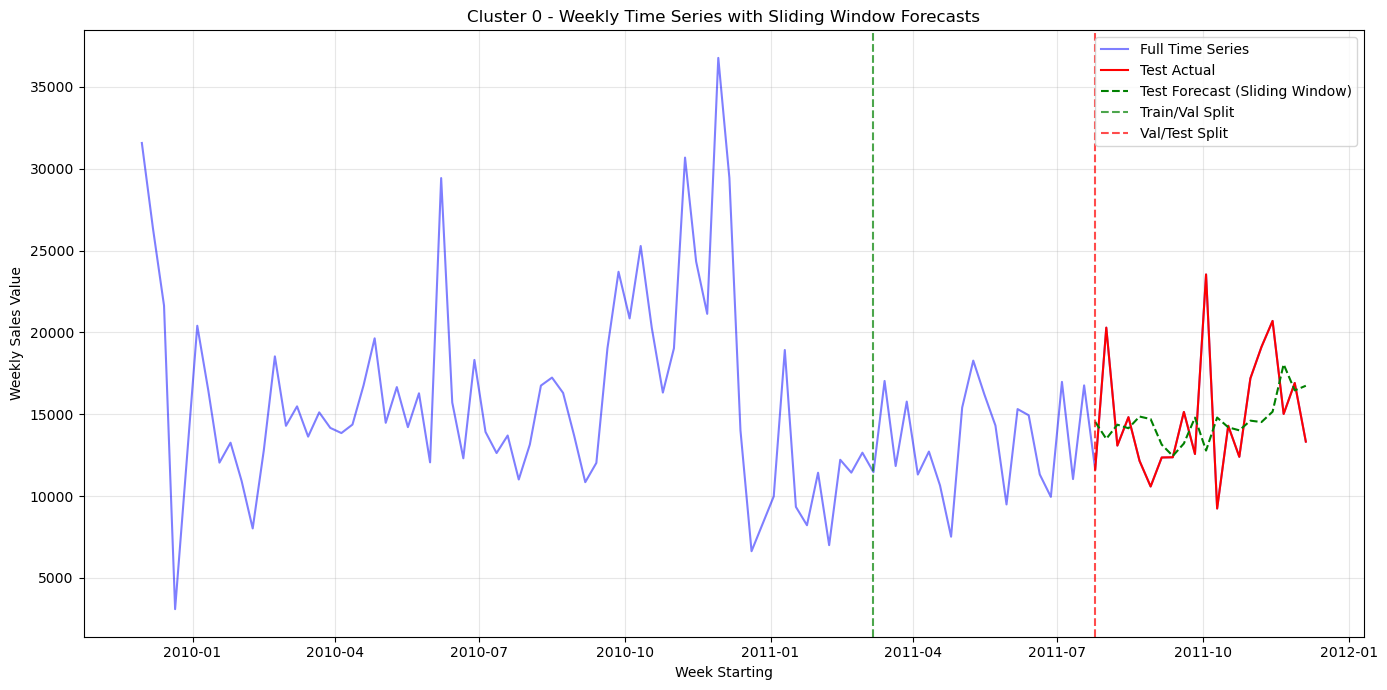


Processing time for Cluster 0: 0.93 seconds

--- Overall Cluster Summary ---
 Cluster  Validation_MAPE  Test_MAPE    Test_MAE   Test_RMSE  Valid_Forecasts
       1        14.737838  15.334303 4255.598359 6324.037106               20
       2        26.910100  14.775970 2992.854664 4156.197285               20
       0        25.197958  20.267629 3058.526183 3995.557889               20

Average Test MAPE across all clusters: 16.7926%


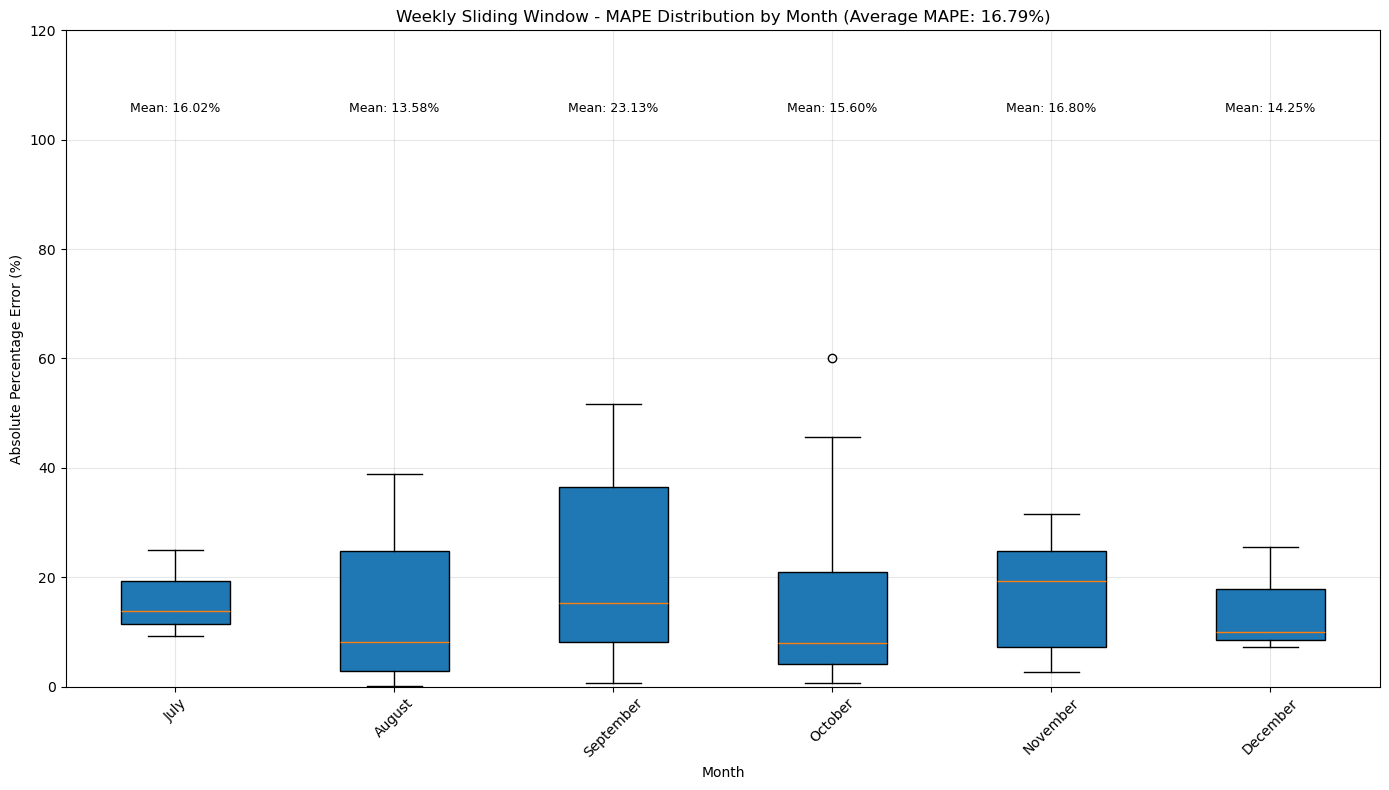


--- Summary Statistics for MAPE by Month ---

July:
  Number of weeks: 3
  Mean APE: 16.02%
  Median APE: 13.74%
  Min APE: 9.26%
  Max APE: 25.04%
  Standard Deviation: 6.64%

August:
  Number of weeks: 15
  Mean APE: 13.58%
  Median APE: 8.10%
  Min APE: 0.06%
  Max APE: 38.91%
  Standard Deviation: 12.84%

September:
  Number of weeks: 12
  Mean APE: 23.13%
  Median APE: 15.21%
  Min APE: 0.65%
  Max APE: 51.58%
  Standard Deviation: 17.57%

October:
  Number of weeks: 15
  Mean APE: 15.60%
  Median APE: 7.96%
  Min APE: 0.65%
  Max APE: 60.13%
  Standard Deviation: 17.63%

November:
  Number of weeks: 12
  Mean APE: 16.80%
  Median APE: 19.36%
  Min APE: 2.68%
  Max APE: 31.61%
  Standard Deviation: 9.74%

December:
  Number of weeks: 3
  Mean APE: 14.25%
  Median APE: 10.00%
  Min APE: 7.15%
  Max APE: 25.60%
  Standard Deviation: 8.11%

Monthly MAPE Summary:
    Month  Number of Weeks  Mean APE (%)  Median APE (%)  Min APE (%)  Max APE (%)  Std Dev (%)
     July                3

In [14]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Suppress warnings
warnings.filterwarnings("ignore")

# Define sliding window size (in weeks)
WINDOW_SIZE = 8  # 8-week sliding window

# Load data
print("Loading data...")
data = pd.read_csv("merged_with_word2vec_clusters.csv")

# Ensure InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate sales value if not already present
if 'SalesValue' not in data.columns:
    data['SalesValue'] = data['Quantity'] * data['Price']

# Filter to only positive values
#data = data[data['SalesValue'] > 0]
print(f"Data shape after filtering for positive SalesValue: {data.shape}")

# Store results for final boxplot by month
monthly_ape_values = {}
month_labels = []
ape_values_list = []

# Store overall results for each cluster
cluster_results = []

# Define model parameters to test
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'damped_trend': [True, False]
}
grid = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

# Process for each cluster
clusters = data['word2vec_cluster'].unique()

for cluster in clusters:
    start_time = time.time()
    print(f"\n\n{'='*50}")
    print(f"Processing Cluster {cluster} - Weekly with Sliding Window")
    print(f"{'='*50}")
    
    # Filter data for this cluster
    cluster_df = data[data['word2vec_cluster'] == cluster].copy()
    
    # Add week start date column for grouping
    cluster_df['WeekStart'] = cluster_df['InvoiceDate'].dt.to_period('W').dt.start_time
    
    # Aggregate by week
    weekly_data = cluster_df.groupby('WeekStart')['SalesValue'].sum().reset_index()
    weekly_data = weekly_data.rename(columns={'WeekStart': 'ds', 'SalesValue': 'y'})
    weekly_data = weekly_data.sort_values('ds').dropna(subset=['y'])
    
    # Add month information (for later reporting)
    weekly_data['Month'] = weekly_data['ds'].dt.month_name()
    
    # Check if data exists after preprocessing
    if len(weekly_data) < WINDOW_SIZE + 6:  # Need window size plus some test points
        print(f"Not enough weekly data points for Cluster {cluster}. Skipping.")
        continue
        
    print(f"Weekly data points: {len(weekly_data)}")
    
    # Calculate split points for 60% train, 20% validation, 20% test
    # Note: We're working with week-based periods now
    total_weeks = len(weekly_data)
    test_weeks = int(total_weeks * 0.20)
    val_weeks = int(total_weeks * 0.20)
    train_weeks = total_weeks - test_weeks - val_weeks
    
    # Create the splits based on index since dates are not evenly spaced
    train_data = weekly_data.iloc[:train_weeks].copy()
    val_data = weekly_data.iloc[train_weeks:train_weeks+val_weeks].copy()
    test_data = weekly_data.iloc[train_weeks+val_weeks:].copy()
    
    # Get cutoff dates for visualization
    cutoff_val = val_data.iloc[0]['ds']
    cutoff_test = test_data.iloc[0]['ds']
    
    print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")
    
    # Check if we have enough data in each set
    if len(train_data) < WINDOW_SIZE or len(val_data) < 2 or len(test_data) < 2:
        print(f"Not enough data in splits for Cluster {cluster}. Skipping.")
        continue
    
    results_list = []
    
    # Test all parameter combinations using sliding window on validation set
    for params in grid:
        param_dict = dict(zip(param_names, params))
        
        # Skip invalid combinations (can't have damped trend without trend)
        if param_dict['trend'] is None and param_dict['damped_trend'] is True:
            continue
        
        model_desc = f"Trend: {param_dict['trend']}, Seasonal: {param_dict['seasonal']}, Damped: {param_dict['damped_trend']}"
        print(f"\nTrying model: {model_desc}")
        
        try:
            # For each week in validation set, create a forecast using the sliding window
            val_forecasts = []
            val_actual = []
            val_dates = []
            
            for i in range(len(val_data)):
                # Get target date to forecast
                target_date = val_data.iloc[i]['ds']
                val_dates.append(target_date)
                
                # Get actual value for this date (for later comparison)
                actual_value = val_data.iloc[i]['y']
                val_actual.append(actual_value)
                
                # Get the window end index (last week before target)
                target_idx = weekly_data[weekly_data['ds'] == target_date].index[0]
                window_end_idx = target_idx - 1
                
                # Get the window start index
                window_start_idx = window_end_idx - WINDOW_SIZE + 1
                
                # Check if we have sufficient window data
                if window_start_idx < 0:
                    val_forecasts.append(np.nan)
                    continue
                
                # Get window data
                window_data = weekly_data.iloc[window_start_idx:window_end_idx+1].copy()
                
                # Check if we have enough data for seasonality
                if param_dict['seasonal'] is not None:
                    # Determine appropriate seasonal period based on window size
                    if len(window_data) >= 12:
                        seasonal_period = 4  # Monthly pattern (4 weeks)
                    else:
                        # Not enough data for seasonality
                        seasonal_period = None
                        current_seasonal = None
                else:
                    seasonal_period = None
                    current_seasonal = None
                
                # Create and fit model on this window
                window_model = ExponentialSmoothing(
                    window_data['y'].values,
                    trend=param_dict['trend'],
                    seasonal=current_seasonal,
                    seasonal_periods=seasonal_period,
                    damped_trend=param_dict['damped_trend']
                )
                
                # Try to fit with optimization, fall back if it fails
                try:
                    fitted_model = window_model.fit(optimized=True)
                except:
                    try:
                        fitted_model = window_model.fit(optimized=False)
                    except Exception as e:
                        print(f"  Window fit failed: {e}")
                        val_forecasts.append(np.nan)
                        continue
                
                # Generate forecast for the target week
                forecast = fitted_model.forecast(1)[0]
                val_forecasts.append(forecast)
            
            # Convert to numpy arrays
            val_forecasts = np.array(val_forecasts)
            val_actual = np.array(val_actual)
            
            # Remove any NaN values for evaluation
            valid_indices = ~np.isnan(val_forecasts)
            if sum(valid_indices) == 0:
                print(f"  No valid forecasts for {model_desc}. Skipping.")
                continue
                
            valid_forecasts = val_forecasts[valid_indices]
            valid_actual = val_actual[valid_indices]
            valid_dates = [val_dates[i] for i, valid in enumerate(valid_indices) if valid]
            
            # Calculate validation metrics
            safe_actual = np.where(valid_actual < 1e-10, 1e-10, valid_actual)
            val_ape = 100 * np.abs((valid_actual - valid_forecasts) / safe_actual)
            val_mape = np.mean(val_ape)
            val_mae = mean_absolute_error(valid_actual, valid_forecasts)
            val_rmse = np.sqrt(mean_squared_error(valid_actual, valid_forecasts))
            
            print(f"  Validation MAPE: {val_mape:.4f}%, MAE: {val_mae:.4f}, Valid forecasts: {sum(valid_indices)}/{len(val_forecasts)}")
            
            # Store the results
            results_list.append({
                'params': param_dict,
                'MAPE': val_mape,
                'MAE': val_mae,
                'RMSE': val_rmse,
                'ValidForecasts': sum(valid_indices),
                'model_desc': model_desc
            })
            
        except Exception as e:
            print(f"  Error with params {param_dict}: {e}")
    
    # Select best model based on validation MAPE
    if not results_list:
        print(f"No successful models for Cluster {cluster}")
        continue
    
    # Convert to DataFrame for easier handling
    results_df = pd.DataFrame([
        {
            'Model': r['model_desc'],
            'MAPE': r['MAPE'],
            'MAE': r['MAE'],
            'RMSE': r['RMSE'],
            'ValidForecasts': r['ValidForecasts']
        } for r in results_list
    ])
    
    # Find the best model
    best_idx = results_df['MAPE'].idxmin()
    best_params = results_list[best_idx]['params']
    
    print("\nBest Parameters Found (from validation set):")
    print(results_df.sort_values('MAPE').head().to_string(index=False))
    print(f"\nBest model: {results_list[best_idx]['model_desc']}")
    print(f"Validation MAPE: {results_list[best_idx]['MAPE']:.4f}%")
    
    # Apply the best model to the test set using sliding window
    try:
        # For each week in test set, create a forecast using the sliding window
        test_forecasts = []
        test_actual = []
        test_dates = []
        test_ape_values = []
        
        for i in range(len(test_data)):
            # Get target date to forecast
            target_date = test_data.iloc[i]['ds']
            test_dates.append(target_date)
            
            # Get actual value for this date (for later comparison)
            actual_value = test_data.iloc[i]['y']
            test_actual.append(actual_value)
            
            # Get the window end index (last week before target)
            target_idx = weekly_data[weekly_data['ds'] == target_date].index[0]
            window_end_idx = target_idx - 1
            
            # Get the window start index
            window_start_idx = window_end_idx - WINDOW_SIZE + 1
            
            # Check if we have sufficient window data
            if window_start_idx < 0:
                test_forecasts.append(np.nan)
                test_ape_values.append(np.nan)
                continue
            
            # Get window data
            window_data = weekly_data.iloc[window_start_idx:window_end_idx+1].copy()
            
            # Check if we have enough data for seasonality
            if best_params['seasonal'] is not None:
                # Determine appropriate seasonal period based on window size
                if len(window_data) >= 12:
                    seasonal_period = 4  # Monthly pattern (4 weeks)
                else:
                    # Not enough data for seasonality
                    seasonal_period = None
                    current_seasonal = None
            else:
                seasonal_period = None
                current_seasonal = None
            
            # Create and fit model on this window with best parameters
            window_model = ExponentialSmoothing(
                window_data['y'].values,
                trend=best_params['trend'],
                seasonal=current_seasonal,
                seasonal_periods=seasonal_period,
                damped_trend=best_params['damped_trend']
            )
            
            # Try to fit with optimization, fall back if it fails
            try:
                fitted_model = window_model.fit(optimized=True)
            except:
                try:
                    fitted_model = window_model.fit(optimized=False)
                except Exception as e:
                    print(f"  Test window fit failed: {e}")
                    test_forecasts.append(np.nan)
                    test_ape_values.append(np.nan)
                    continue
            
            # Generate forecast for the target week
            forecast = fitted_model.forecast(1)[0]
            test_forecasts.append(forecast)
            
            # Calculate APE for this forecast
            if actual_value < 1e-10:
                safe_actual = 1e-10
            else:
                safe_actual = actual_value
                
            ape = 100 * np.abs((actual_value - forecast) / safe_actual)
            test_ape_values.append(ape)
        
        # Convert to numpy arrays
        test_forecasts = np.array(test_forecasts)
        test_actual = np.array(test_actual)
        test_ape_values = np.array(test_ape_values)
        
        # Remove any NaN values for evaluation
        valid_indices = ~np.isnan(test_forecasts)
        if sum(valid_indices) == 0:
            print(f"No valid test forecasts. Skipping.")
            continue
            
        valid_forecasts = test_forecasts[valid_indices]
        valid_actual = test_actual[valid_indices]
        valid_dates = [test_dates[i] for i, valid in enumerate(valid_indices) if valid]
        valid_ape = test_ape_values[valid_indices]
        
        # Calculate test metrics
        test_mape = np.mean(valid_ape)
        test_mae = mean_absolute_error(valid_actual, valid_forecasts)
        test_rmse = np.sqrt(mean_squared_error(valid_actual, valid_forecasts))
        
        print("\n--- Final Test Set Evaluation (Weekly Sliding Window) ---")
        print(f"MAPE: {test_mape:.4f}%")
        print(f"MAE : {test_mae:.4f}")
        print(f"RMSE: {test_rmse:.4f}")
        print(f"Valid forecasts: {sum(valid_indices)}/{len(test_forecasts)}")
        
        # Create DataFrame with test results
        test_results_df = pd.DataFrame({
            'Date': valid_dates,
            'Actual': valid_actual,
            'Forecast': valid_forecasts,
            'APE': valid_ape
        })
        
        # Add month information
        test_results_df['Month'] = pd.DatetimeIndex(test_results_df['Date']).month_name()
        
        # Store cluster results
        cluster_result = {
            'Cluster': cluster,
            'Best_Model': results_list[best_idx]['model_desc'],
            'Validation_MAPE': results_list[best_idx]['MAPE'],
            'Test_MAPE': test_mape,
            'Test_MAE': test_mae,
            'Test_RMSE': test_rmse,
            'Valid_Forecasts': sum(valid_indices)
        }
        cluster_results.append(cluster_result)
        
        # Store APE values by month for the boxplot
        for month in test_results_df['Month'].unique():
            month_data = test_results_df[test_results_df['Month'] == month]
            
            if month not in monthly_ape_values:
                monthly_ape_values[month] = []
            
            monthly_ape_values[month].extend(month_data['APE'].tolist())
            month_labels.extend([month] * len(month_data))
            ape_values_list.extend(month_data['APE'].tolist())
        
        # Plot test results
        plt.figure(figsize=(12, 6))
        plt.plot(test_results_df['Date'], test_results_df['Actual'], 'ro-', label='Actual Test Data')
        plt.plot(test_results_df['Date'], test_results_df['Forecast'], 'ko--', label='Sliding Window Forecast')
        plt.title(f'Cluster {cluster} - Weekly Sliding Window Forecast vs Actual (MAPE: {test_mape:.2f}%)')
        plt.xlabel('Week Starting')
        plt.ylabel('Weekly Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot all data with highlighted test period
        plt.figure(figsize=(14, 7))
        
        # Plot full time series
        plt.plot(weekly_data['ds'], weekly_data['y'], 'b-', alpha=0.5, label='Full Time Series')
        
        # Highlight test period with forecasts
        plt.plot(test_results_df['Date'], test_results_df['Actual'], 'r-', label='Test Actual')
        plt.plot(test_results_df['Date'], test_results_df['Forecast'], 'g--', label='Test Forecast (Sliding Window)')
        
        # Add vertical lines for train/val/test splits
        plt.axvline(x=cutoff_val, color='g', linestyle='--', alpha=0.7, label='Train/Val Split')
        plt.axvline(x=cutoff_test, color='r', linestyle='--', alpha=0.7, label='Val/Test Split')
        
        plt.title(f'Cluster {cluster} - Weekly Time Series with Sliding Window Forecasts')
        plt.xlabel('Week Starting')
        plt.ylabel('Weekly Sales Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error in final model fitting/evaluation: {e}")
    
    end_time = time.time()
    print(f"\nProcessing time for Cluster {cluster}: {(end_time - start_time):.2f} seconds")

# Create summary DataFrame for all clusters
if cluster_results:
    cluster_summary = pd.DataFrame(cluster_results)
    print("\n--- Overall Cluster Summary ---")
    print(cluster_summary[['Cluster', 'Validation_MAPE', 'Test_MAPE', 'Test_MAE', 'Test_RMSE', 'Valid_Forecasts']].to_string(index=False))
    
    # Calculate average MAPE across all clusters
    avg_mape = cluster_summary['Test_MAPE'].mean()
    print(f"\nAverage Test MAPE across all clusters: {avg_mape:.4f}%")

# Create monthly boxplots if we have data
if monthly_ape_values:
    # Define month order for proper sorting
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Filter to only include months that exist in our data
    valid_months = [month for month in month_order if month in monthly_ape_values]
    
    # Create a side-by-side boxplot using matplotlib
    plt.figure(figsize=(14, 8))
    
    # Filter and order the monthly_ape_values dictionary
    ordered_monthly_ape = [monthly_ape_values[month] for month in valid_months if month in monthly_ape_values]
    
    # Create boxplot
    boxplot = plt.boxplot(ordered_monthly_ape, labels=valid_months, vert=True, patch_artist=True)
    
    # Calculate and display mean MAPE for each month
    mean_mapes = [np.mean(monthly_ape_values[month]) for month in valid_months if month in monthly_ape_values]
    for i, mean_mape in enumerate(mean_mapes):
        plt.text(i+1, 105, f'Mean: {mean_mape:.2f}%', ha='center', fontsize=9)
    
    plt.title(f'Weekly Sliding Window - MAPE Distribution by Month (Average MAPE: {avg_mape:.2f}%)')
    plt.ylabel('Absolute Percentage Error (%)')
    plt.xlabel('Month')
    plt.ylim(0, 120)  # Extended to show the mean values above
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Summary statistics for APEs by month
    print("\n--- Summary Statistics for MAPE by Month ---")
    monthly_summary = []
    for month in valid_months:
        if month in monthly_ape_values and len(monthly_ape_values[month]) > 0:
            values = monthly_ape_values[month]
            monthly_summary.append({
                'Month': month,
                'Number of Weeks': len(values),
                'Mean APE (%)': np.mean(values),
                'Median APE (%)': np.median(values),
                'Min APE (%)': np.min(values),
                'Max APE (%)': np.max(values),
                'Std Dev (%)': np.std(values)
            })
            print(f"\n{month}:")
            print(f"  Number of weeks: {len(values)}")
            print(f"  Mean APE: {np.mean(values):.2f}%")
            print(f"  Median APE: {np.median(values):.2f}%")
            print(f"  Min APE: {np.min(values):.2f}%")
            print(f"  Max APE: {np.max(values):.2f}%")
            print(f"  Standard Deviation: {np.std(values):.2f}%")
    
    # Create a summary table as DataFrame
    if monthly_summary:
        monthly_summary_df = pd.DataFrame(monthly_summary)
        print("\nMonthly MAPE Summary:")
        print(monthly_summary_df.to_string(index=False))
else:
    print("\nNo monthly data available for analysis.")

In [13]:
weekly_data[weekly_data['y'] == 0]

,ds,y,Month
